In [2]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3


In [3]:
tc= create_taiga_client_v3()

In [4]:
crispr_dependencies = tc.get(name='internal-24q4-8c04', version=101, file='CRISPRGeneEffect')

In [5]:
crispr_dependencies

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.145242,0.019477,0.056237,-0.173868,0.005131,0.218239,-0.068562,-0.058885,0.191578,0.002530,...,-0.132745,0.080368,0.159529,0.258031,0.179917,-0.249540,0.052480,0.080656,0.160498,-0.426900
ACH-000004,-0.039512,-0.073714,-0.085854,-0.075194,0.021538,-0.140434,0.247872,-0.046966,0.215978,0.131511,...,-0.264802,-0.403360,0.199695,0.105634,0.095723,0.076356,-0.311548,0.106594,0.271735,-0.054990
ACH-000005,-0.179671,0.041547,0.187036,0.088175,-0.127169,-0.259563,0.154824,-0.045603,-0.135695,0.018855,...,-0.331664,-0.393016,-0.083058,-0.047129,0.002738,-0.174817,-0.058520,-0.040518,0.066276,-0.090507
ACH-000007,-0.058821,-0.127777,0.084479,0.065821,0.039912,-0.016302,-0.023659,-0.156820,-0.160647,0.171016,...,-0.365998,-0.363134,-0.042620,0.264256,0.049146,-0.052702,-0.399776,0.020496,-0.283006,-0.369503
ACH-000009,-0.043372,-0.141960,0.078283,0.061353,0.118325,-0.100590,0.025024,-0.095865,0.053149,0.059934,...,-0.341299,-0.261603,-0.032972,0.257242,-0.068297,-0.075614,-0.509414,0.092275,-0.011776,-0.274946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,-0.171139,-0.058941,-0.093873,0.019887,-0.026497,-0.073211,0.080759,-0.127011,-0.075251,0.002337,...,-0.341456,-0.458900,-0.040988,0.109176,-0.171388,-0.063561,-0.139759,-0.053729,-0.146962,-0.368850
ACH-003580,0.055524,0.208115,-0.087154,0.078650,0.132832,-0.003156,0.118247,-0.231775,0.045564,0.280823,...,-0.333588,-0.660225,0.034779,0.273591,-0.186056,-0.208219,-0.308978,0.129455,-0.163789,-0.338718
ACH-003587,-0.017993,-0.372994,-0.082105,0.216732,-0.017278,0.009151,0.071652,-0.553196,-0.224519,0.309110,...,-0.414315,-0.630464,-0.144833,0.151849,-0.146543,0.029709,-0.387989,0.067026,-0.249321,-0.192970
ACH-003590,-0.087854,-0.008505,0.056008,0.146640,-0.112046,-0.052856,0.165373,-0.423358,0.010036,0.157737,...,-0.623025,-0.618526,-0.090796,0.138445,-0.068029,0.022866,-0.089312,0.025531,-0.182506,-0.271250


## Getting transcription factors list

In [7]:
tfs = pd.read_csv("data/tf_list.csv")

In [8]:
tfs.head()

,hugo_symbol
0,TFAP2A
1,TFAP2B
2,TFAP2C
3,TFAP2D
4,TFAP2E


In [9]:
tfs.shape

(1639, 1)

In [10]:
tfs_reviewed = pd.read_excel("data/TF_names.xlsx")

In [11]:
tfs_reviewed.head()

,Unnamed: 0,Original names,Unnamed: 2,new names
0,NaN,C11orf95,NaN,ZFTA
1,NaN,ZBED9,NaN,ZBED9
2,NaN,ARNTL,NaN,BMAL1
3,NaN,ARNTL2,NaN,BMAL2
4,NaN,AC023509.3,NaN,NaN


In [12]:
tfs_reviewed = tfs_reviewed[["Original names", "new names"]]

In [13]:
tfs_reviewed.shape

(15, 2)

In [14]:
tfs = tfs[~tfs["hugo_symbol"].isin(tfs_reviewed["Original names"].values)]

In [15]:
tfs["hugo_symbol"] = pd.concat([tfs["hugo_symbol"], tfs_reviewed["new names"]], ignore_index=True)

In [67]:
tfs


,hugo_symbol
0,TFAP2A
1,TFAP2B
2,TFAP2C
3,TFAP2D
4,TFAP2E
...,...
1634,ZNF705EP
1635,ZNF788P
1636,ZUP1
1637,CENPBD1P


## Filtering matrix

In [17]:
import re

In [18]:
crispr_dependencies.columns

Index(['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)', 'AAAS (8086)',
       'AACS (65985)', 'AADAC (13)',
       ...
       'ZWILCH (55055)', 'ZWINT (11130)', 'ZXDA (7789)', 'ZXDB (158586)',
       'ZXDC (79364)', 'ZYG11A (440590)', 'ZYG11B (79699)', 'ZYX (7791)',
       'ZZEF1 (23140)', 'ZZZ3 (26009)'],
      dtype='object', length=17916)

In [19]:
crispr_dependencies.columns = [re.sub(r"\(\d+\)", "", c).strip() for c in crispr_dependencies.columns]

In [20]:
tfs_found = [tf for tf in tfs["hugo_symbol"] if tf in crispr_dependencies.columns]

In [21]:
len(tfs_found)

1543

In [22]:
crispr_dependencies = crispr_dependencies.loc[:, tfs_found]

In [23]:
crispr_dependencies.to_pickle("pydata/tfs_dependencies.pkl")

In [24]:
Model = tc.get(name='internal-24q4-8c04', version=101, file='Model')

In [28]:
Model

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,None,None,None,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,NaN,SIDM00593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,ACH-003659,PT-UFmFPI,SMS-KAN,SMSKAN,NBL,Peripheral Nervous System,Neuroblastoma,Neuroblastoma,NBL,None,...,None,None,None,None,None,None,None,NaN,None,NaN
2548,ACH-003660,PT-UFmFPI,SMS-KANR,SMSKANR,NBL,Peripheral Nervous System,Neuroblastoma,Neuroblastoma,NBL,None,...,None,None,None,None,None,None,None,NaN,None,NaN
2549,ACH-003665,PT-ZwaNYv,MBU-8,MBU8,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"Compared to the parent cell line, has a comple...",...,None,None,None,None,None,None,None,NaN,None,NaN
2550,ACH-003666,PT-ijqCP4,YCUB-4,YCUB4,BLL,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,BLL,cells express a MEF2D exon5/BCL9 exon 9 fusion,...,None,None,None,None,None,None,MEF2D,NaN,None,NaN


In [29]:
# merge crispr_dependencies with cell line information based on ModelID (index in crispr_dependencies)
crispr_dependencies = crispr_dependencies.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype"]], left_index = True, right_on = 'ModelID')

In [30]:
crispr_dependencies

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype
0,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,-0.645930,0.140806,-0.892911,0.215270,-0.014496,0.169385,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer
3,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.205806,-0.090015,0.168027,0.280951,-0.182743,0.082328,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia
4,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.207084,-0.134599,0.374316,-0.018200,-0.283811,0.058674,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia
6,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,0.140064,-0.069550,0.180594,0.104287,-0.311871,-0.006005,ACH-000007,LS513,Bowel,Colon Adenocarcinoma
8,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,-0.111904,0.027901,0.098494,0.060150,0.014514,0.136429,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,-0.052162,-0.106350,0.018423,0.079413,0.005381,0.105370,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma
2516,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.119621,-0.077457,-0.205756,-0.021425,0.016575,0.077086,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma
2518,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,-0.095881,0.210714,-0.104913,-0.141233,0.058059,0.013758,ACH-003587,531MII,Bone,Osteosarcoma
2520,0.029615,-0.090314,-0.087541,-0.343993,0.073768,-0.087375,-0.049801,-0.047360,0.009253,-0.328680,...,-0.043185,-0.007903,-0.250206,-0.080775,0.102683,0.069626,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
crispr_dependencies_long = crispr_dependencies.melt(value_vars = tfs_found, id_vars= ['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype"],
                                                    var_name = "TF", value_name = "Depmap_score")

In [33]:
crispr_dependencies_long

,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,TF,Depmap_score
0,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,TFAP2A,0.032275
1,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.145169
2,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.171513
3,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,TFAP2A,-0.073170
4,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,TFAP2A,0.224490
...,...,...,...,...,...,...
2118534,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,TBXT,0.105370
2118535,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,TBXT,0.077086
2118536,ACH-003587,531MII,Bone,Osteosarcoma,TBXT,0.013758
2118537,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,TBXT,0.069626


In [34]:
crispr_dependencies_long.Depmap_score.max()

4.7211166262820825

In [35]:
crispr_dependencies_long_myeloid = crispr_dependencies_long.loc[crispr_dependencies_long['OncotreeLineage'] == "Myeloid" , :]

In [36]:
crispr_dependencies_long_myeloid

,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,TF,Depmap_score
1,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.145169
2,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.171513
29,ACH-000045,MV4-11,Myeloid,Acute Myeloid Leukemia,TFAP2A,-0.002675
39,ACH-000074,KU812,Myeloid,"Chronic Myeloid Leukemia, BCR-ABL1+",TFAP2A,-0.230251
41,ACH-000076,NCO2,Myeloid,"Chronic Myeloid Leukemia, BCR-ABL1+",TFAP2A,0.200566
...,...,...,...,...,...,...
2118310,ACH-002476,HAP1MLH1KO,Myeloid,"Chronic Myeloid Leukemia, BCR-ABL1+",TBXT,0.071073
2118359,ACH-002709,CMS,Myeloid,Acute Megakaryoblastic Leukemia,TBXT,0.277834
2118430,ACH-002994,WSU-AML,Myeloid,Acute Myeloid Leukemia,TBXT,0.161686
2118485,ACH-003273,CHRF-288-11,Myeloid,Acute Megakaryoblastic Leukemia,TBXT,0.048096


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Ovary/Fallopian Tube'),
  Text(1, 0, 'Myeloid'),
  Text(2, 0, 'Bowel'),
  Text(3, 0, 'Bladder/Urinary Tract'),
  Text(4, 0, 'Lung'),
  Text(5, 0, 'Skin'),
  Text(6, 0, 'Breast'),
  Text(7, 0, 'Pancreas'),
  Text(8, 0, 'Lymphoid'),
  Text(9, 0, 'CNS/Brain'),
  Text(10, 0, 'Soft Tissue'),
  Text(11, 0, 'Bone'),
  Text(12, 0, 'Esophagus/Stomach'),
  Text(13, 0, 'Peripheral Nervous System'),
  Text(14, 0, 'Pleura'),
  Text(15, 0, 'Prostate'),
  Text(16, 0, 'Kidney'),
  Text(17, 0, 'Fibroblast'),
  Text(18, 0, 'Biliary Tract'),
  Text(19, 0, 'Head and Neck'),
  Text(20, 0, 'Thyroid'),
  Text(21, 0, 'Ampulla of Vater'),
  Text(22, 0, 'Uterus'),
  Text(23, 0, 'Liver'),
  Text(24, 0, 'Cervix'),
  Text(25, 0, 'Eye'),
  Text(26, 0, 'Vulva/Vagina'),
  Text(27, 0, 'Adrenal Gland'),
  Text(28, 0, 'Testis'),
  Text(29

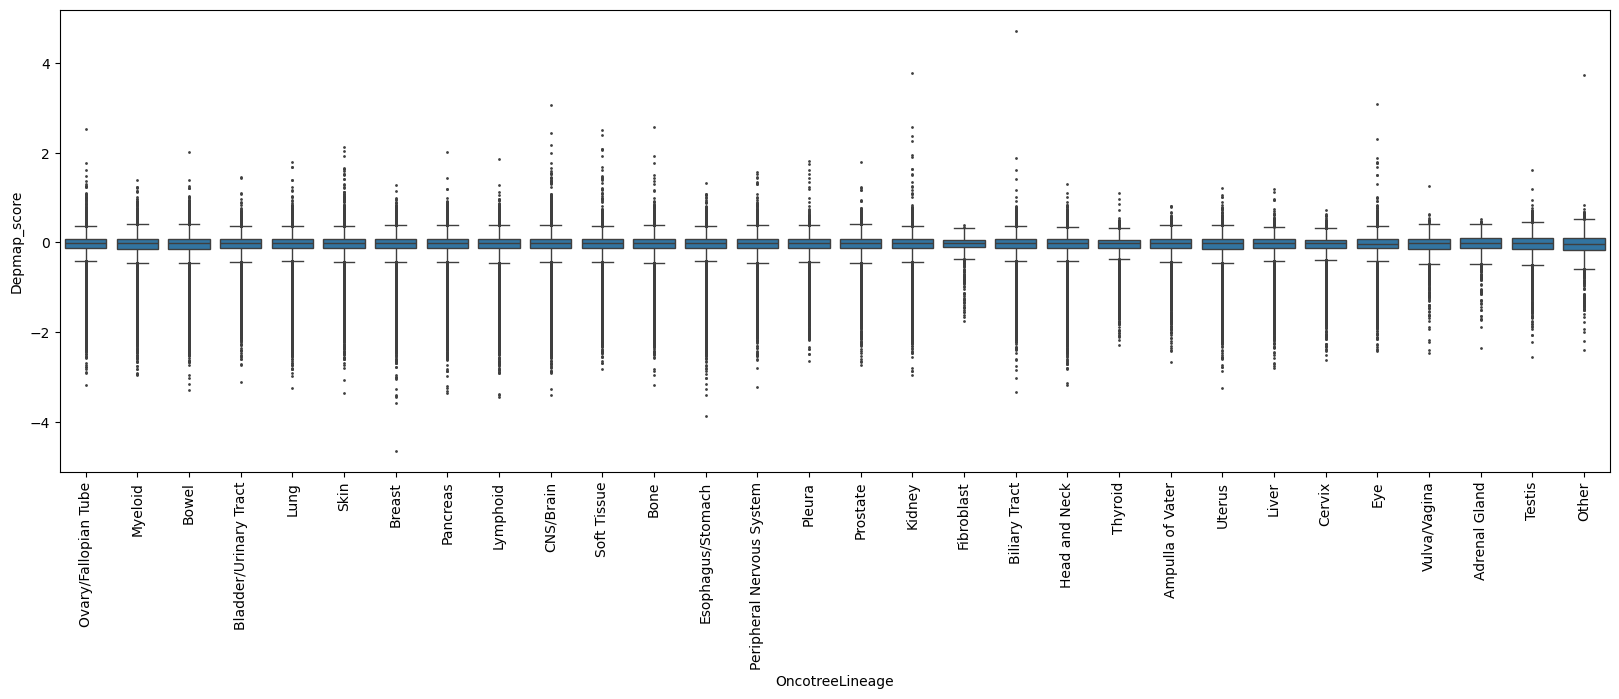

In [37]:
plt.figure(figsize = (20,6))
sns.boxplot(crispr_dependencies_long, x = "OncotreeLineage" , y = "Depmap_score", fliersize= 1)
plt.xticks(rotation = 90)



In [38]:
def make_boxplots(lineage):
    crispr_dependencies_long_lineage = crispr_dependencies_long.loc[crispr_dependencies_long['OncotreeLineage'] == lineage, :]
    plt.figure(figsize = (20,6))
    sns.boxplot(crispr_dependencies_long_lineage, x = "OncotreeSubtype" , y = "Depmap_score", fliersize= 1).set(title = f"{lineage} distribution of CRISPR dependencies")
   # plt.title("Distribution of CRISPR dependencies")
    plt.xticks(rotation = 90)
    plt.show()

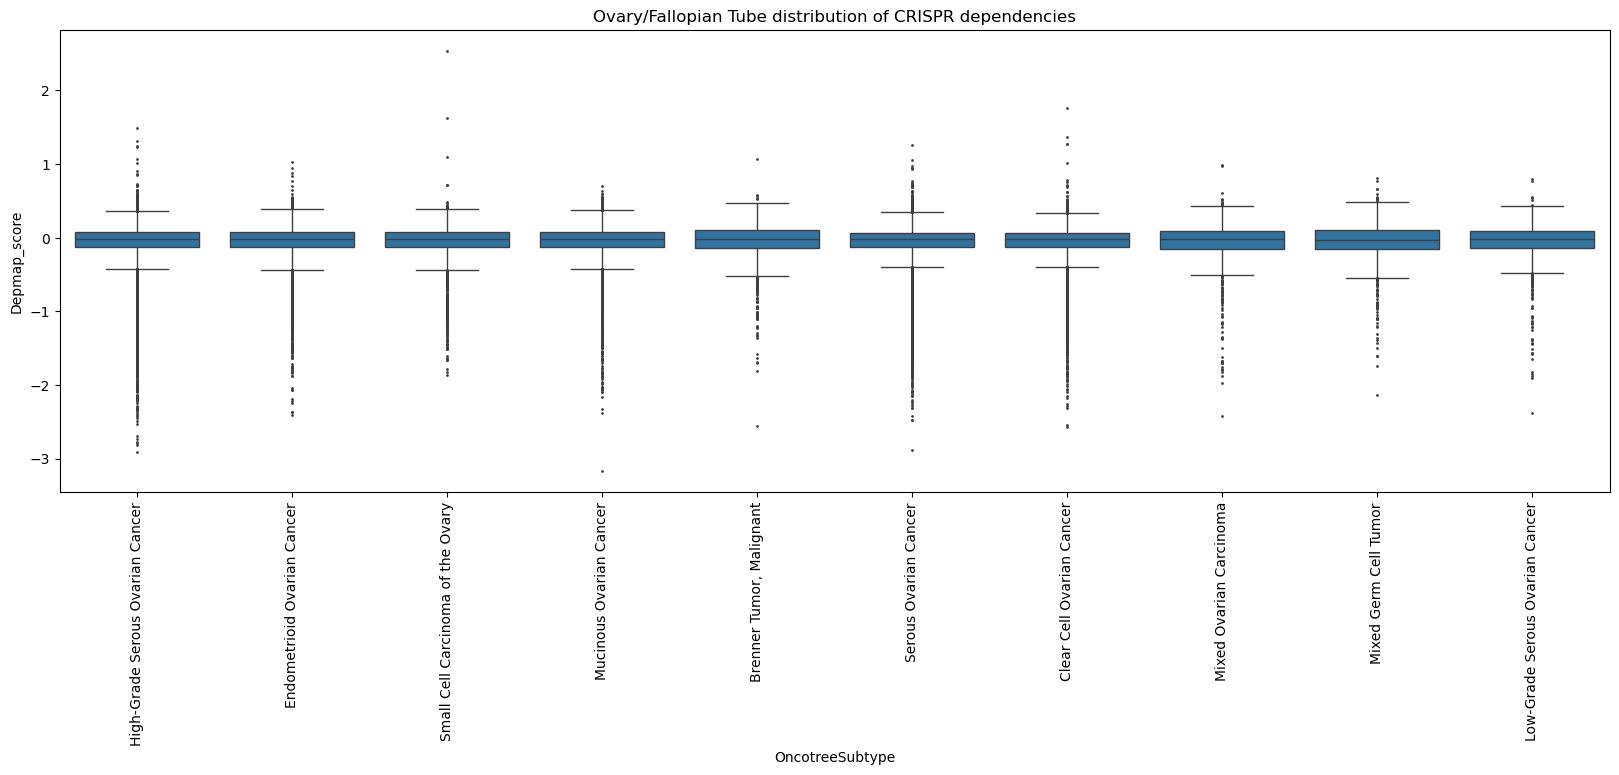

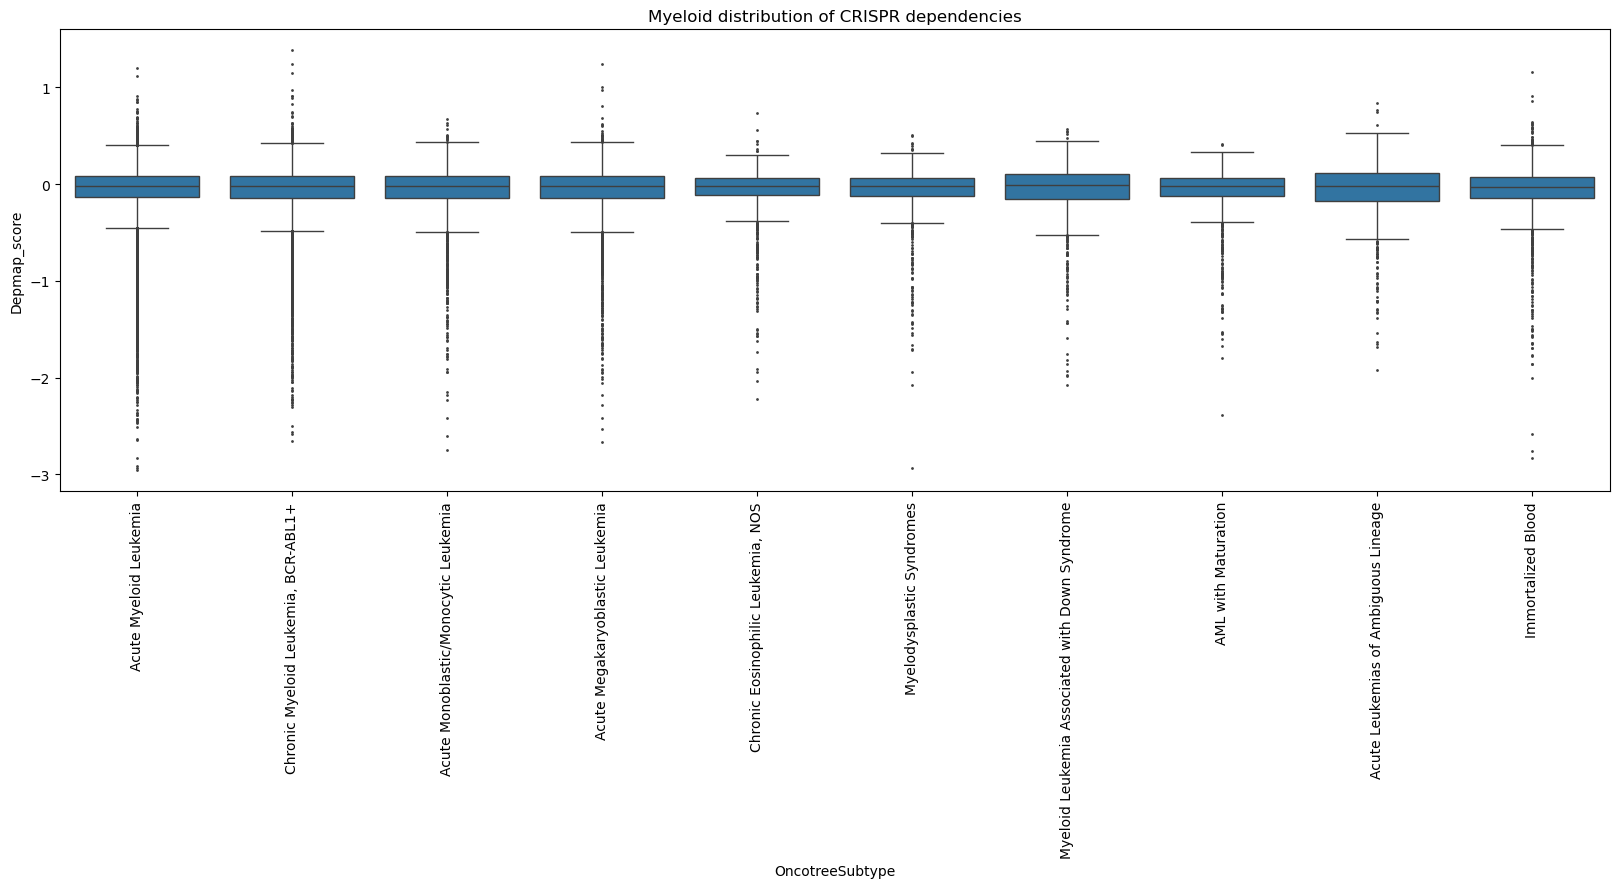

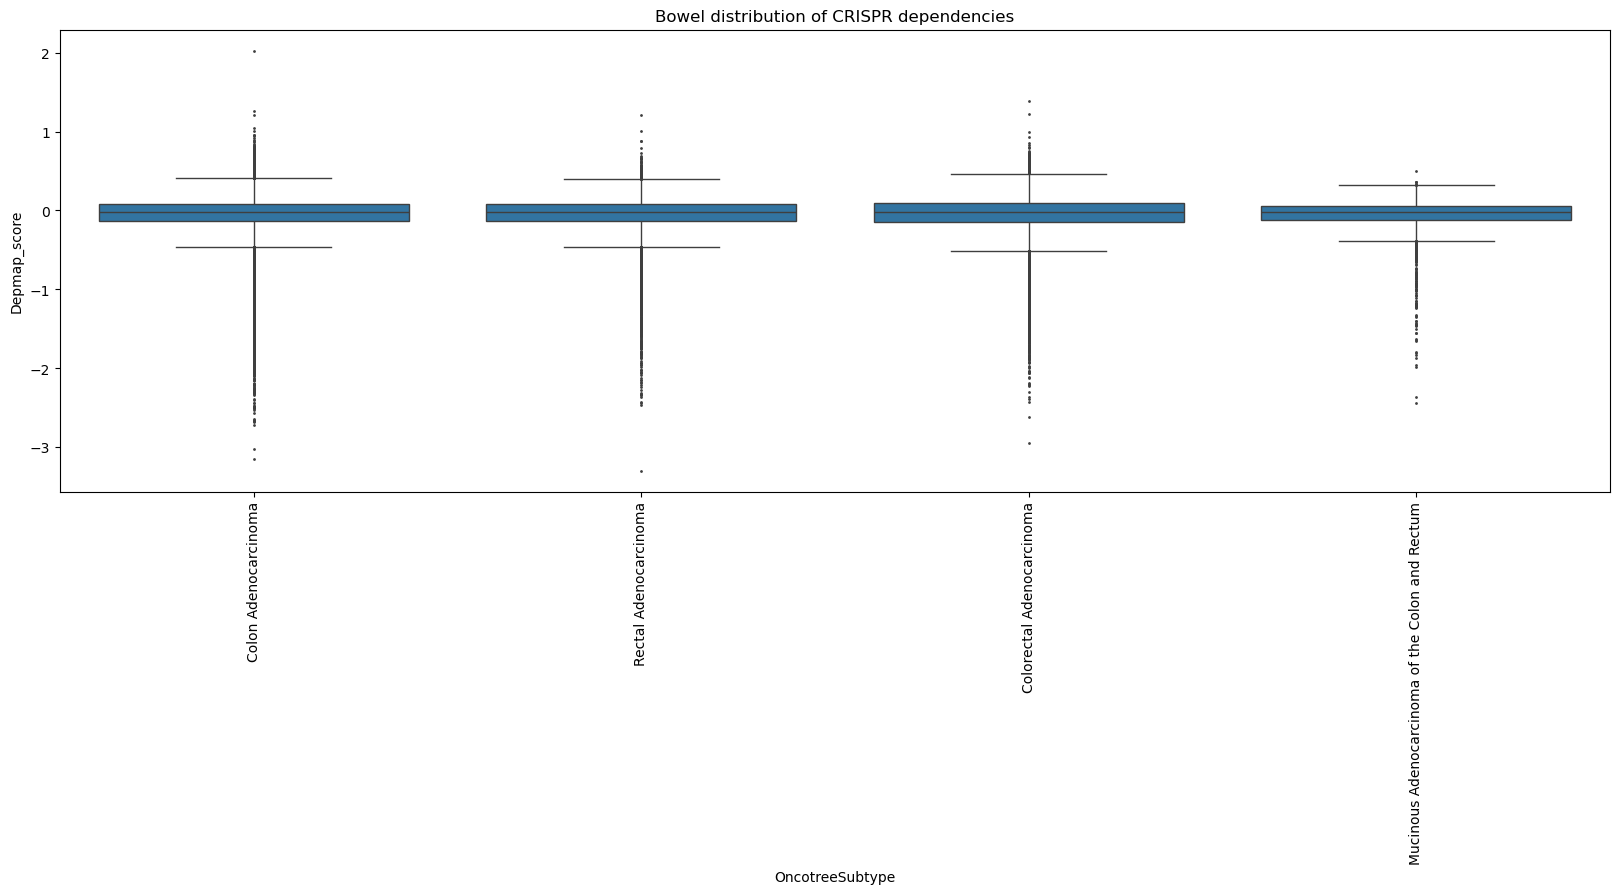

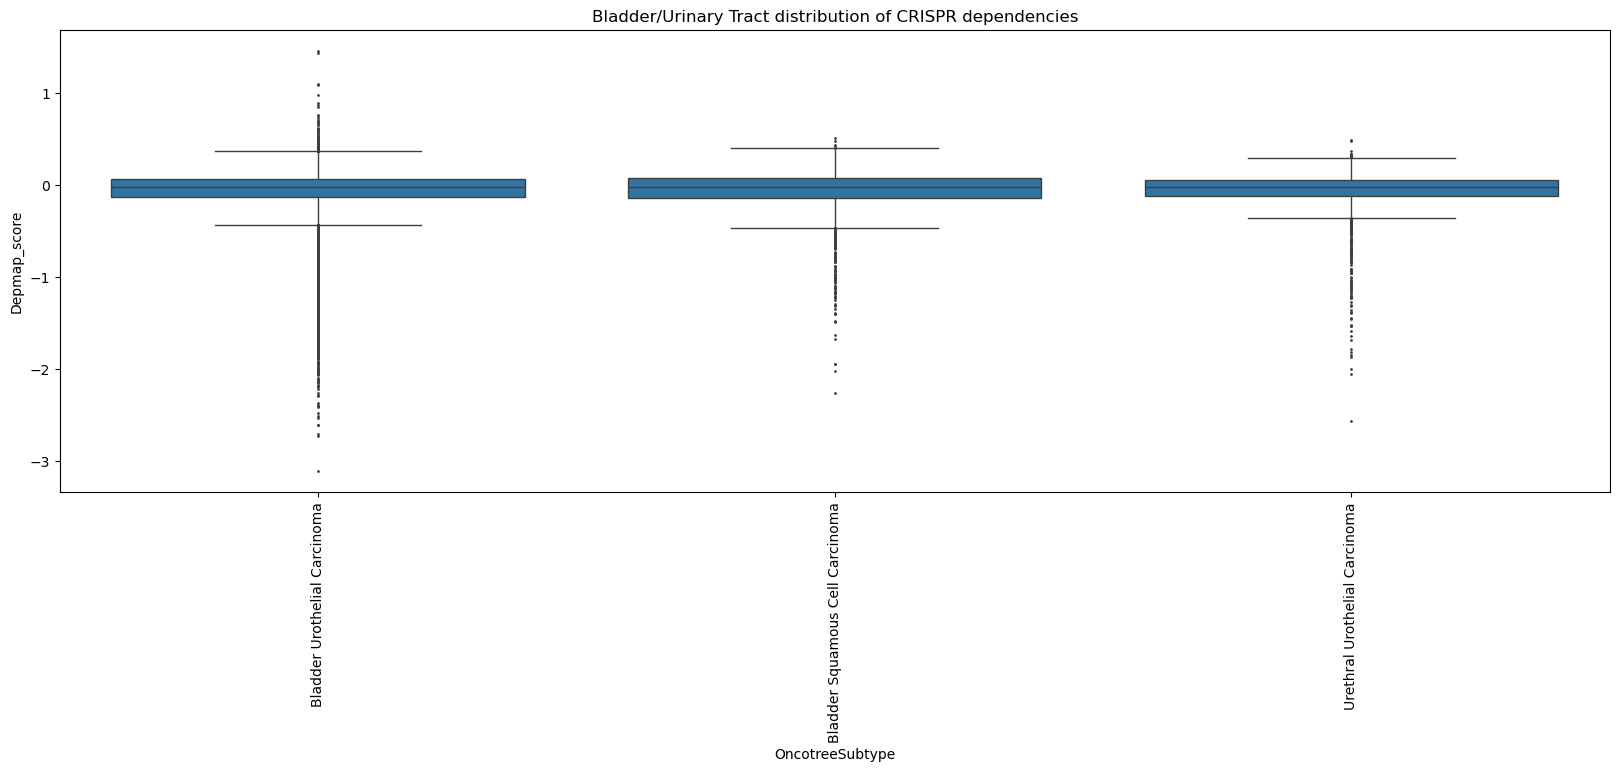

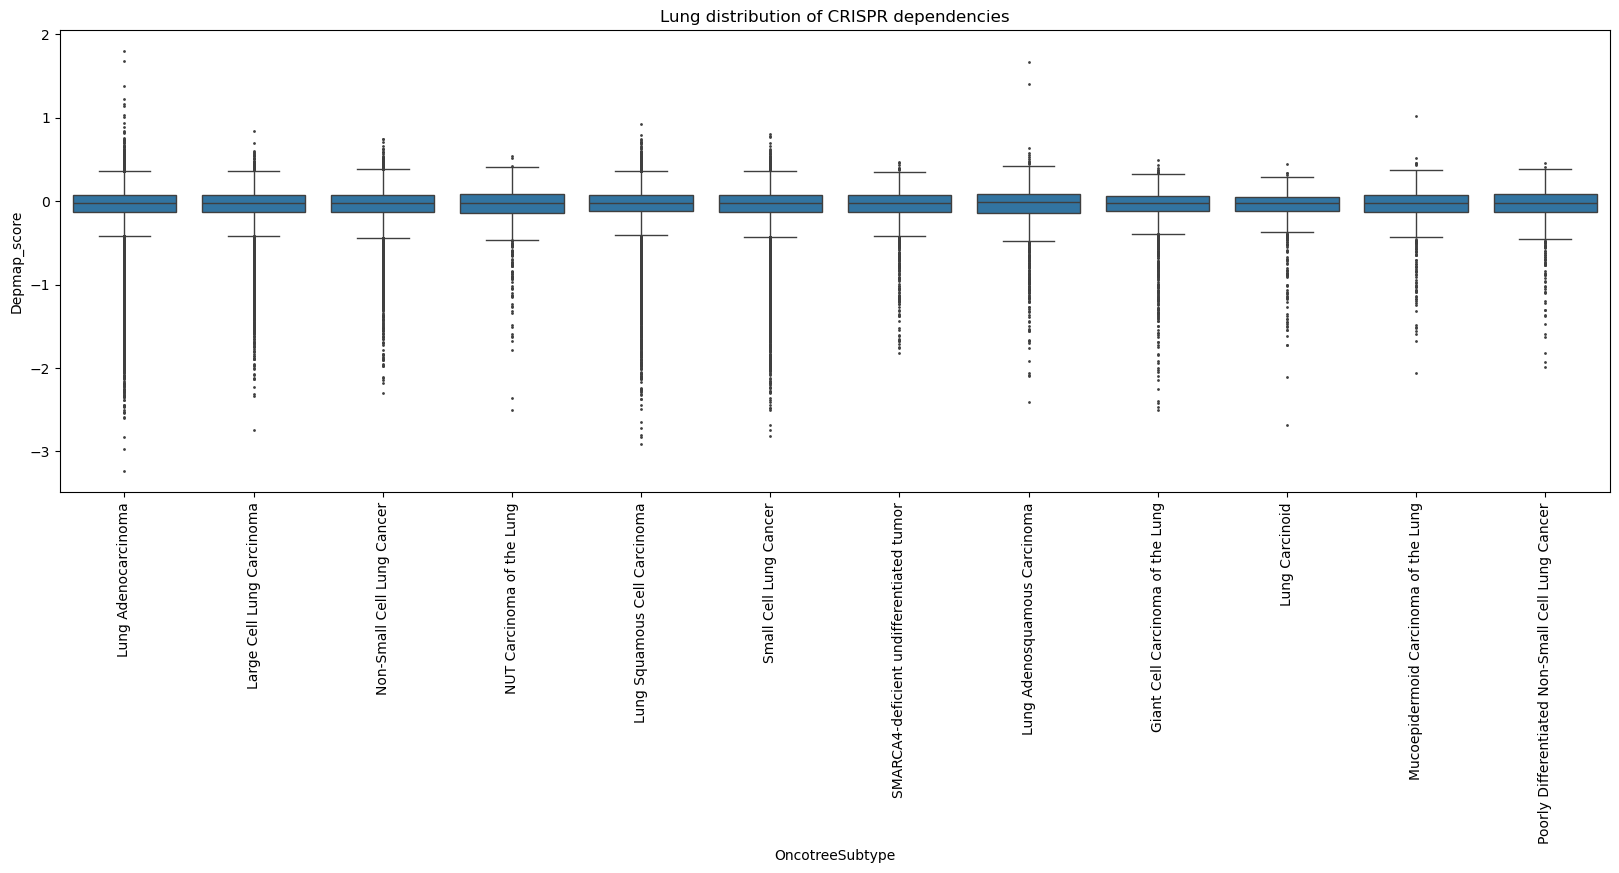

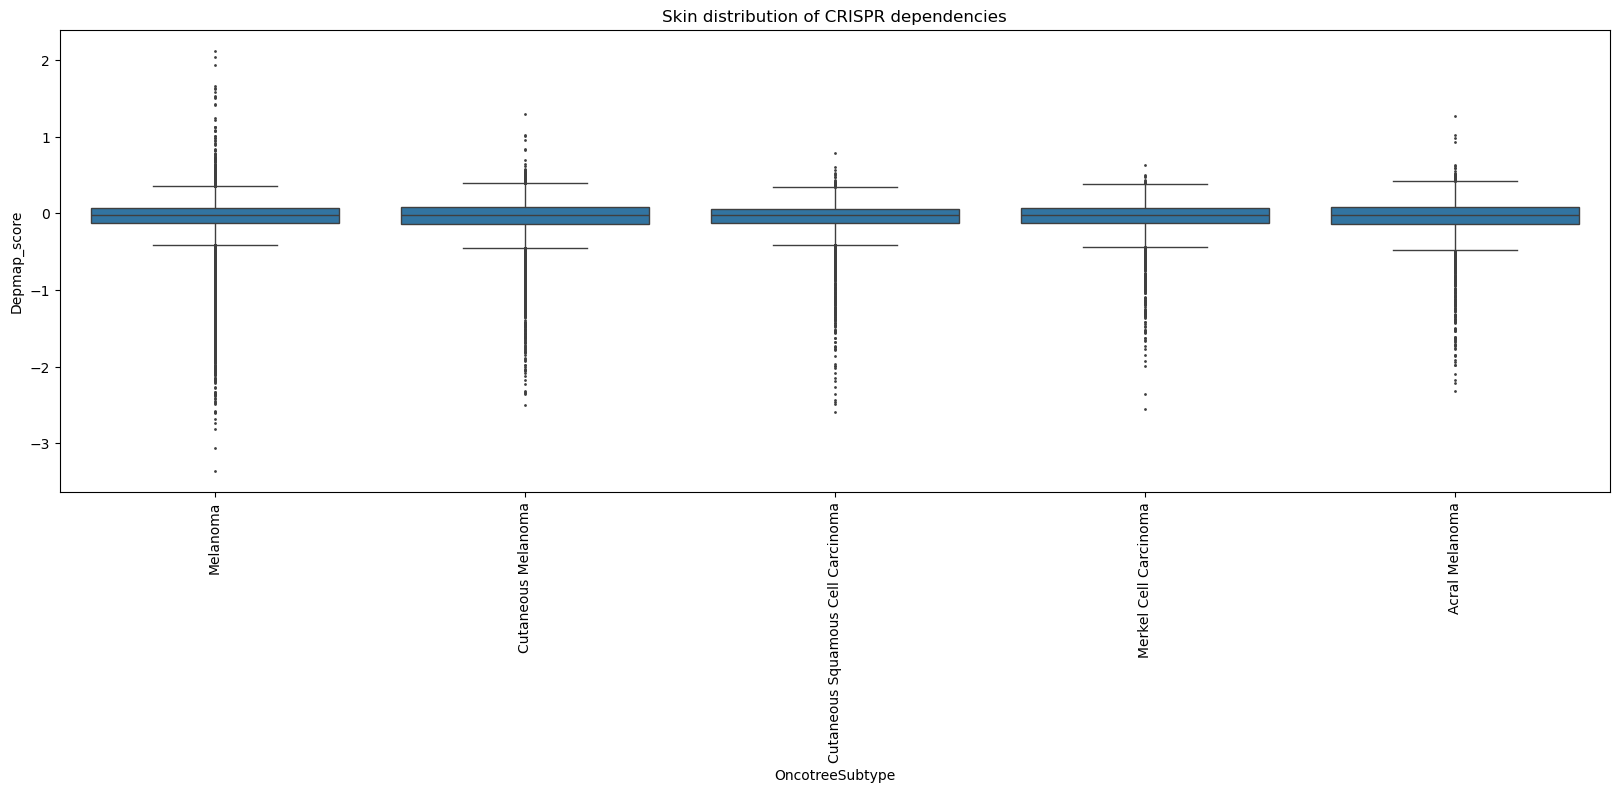

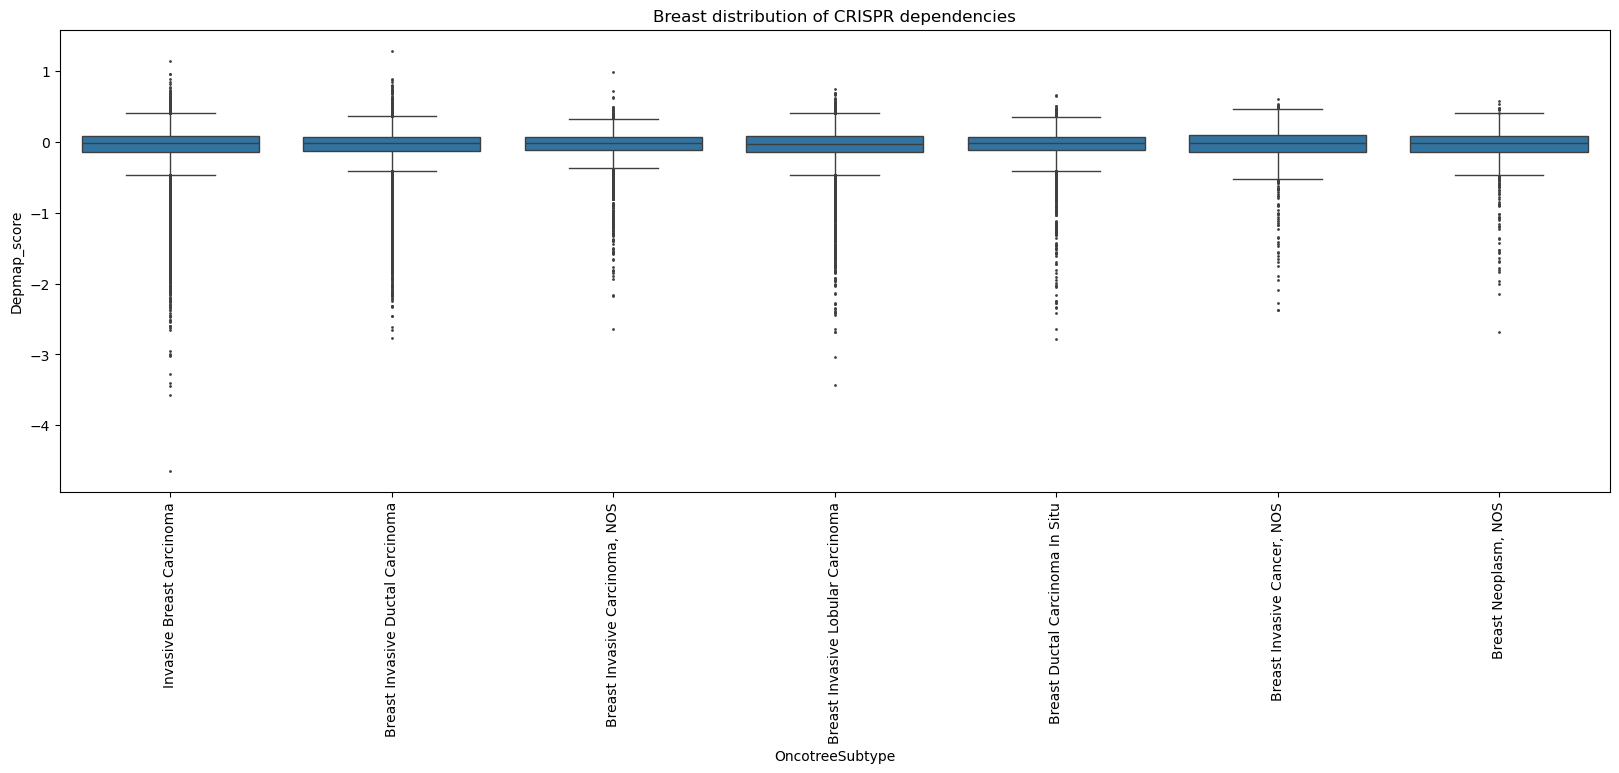

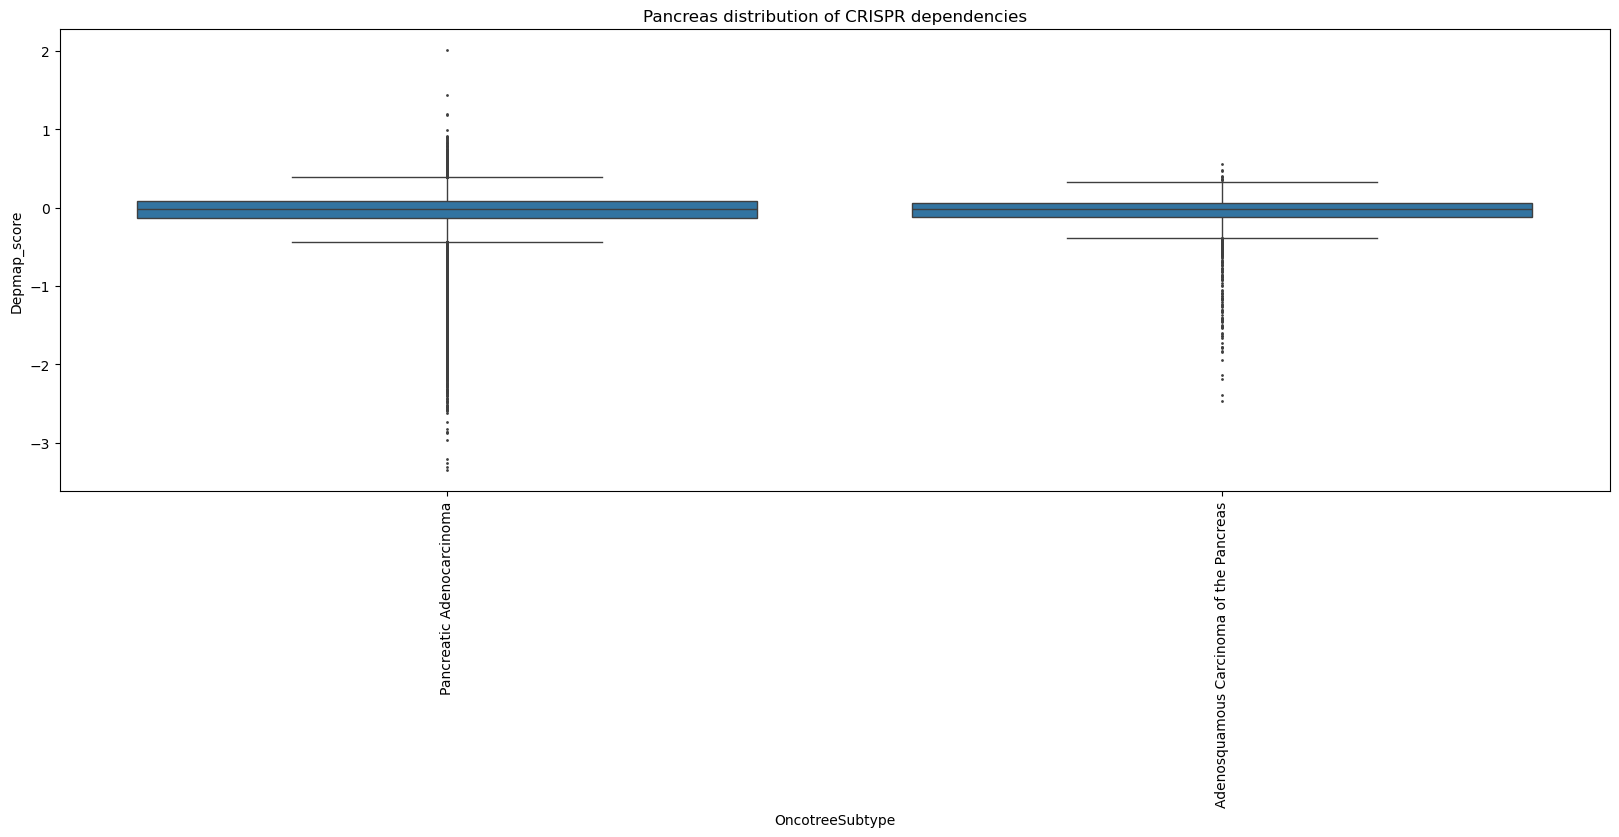

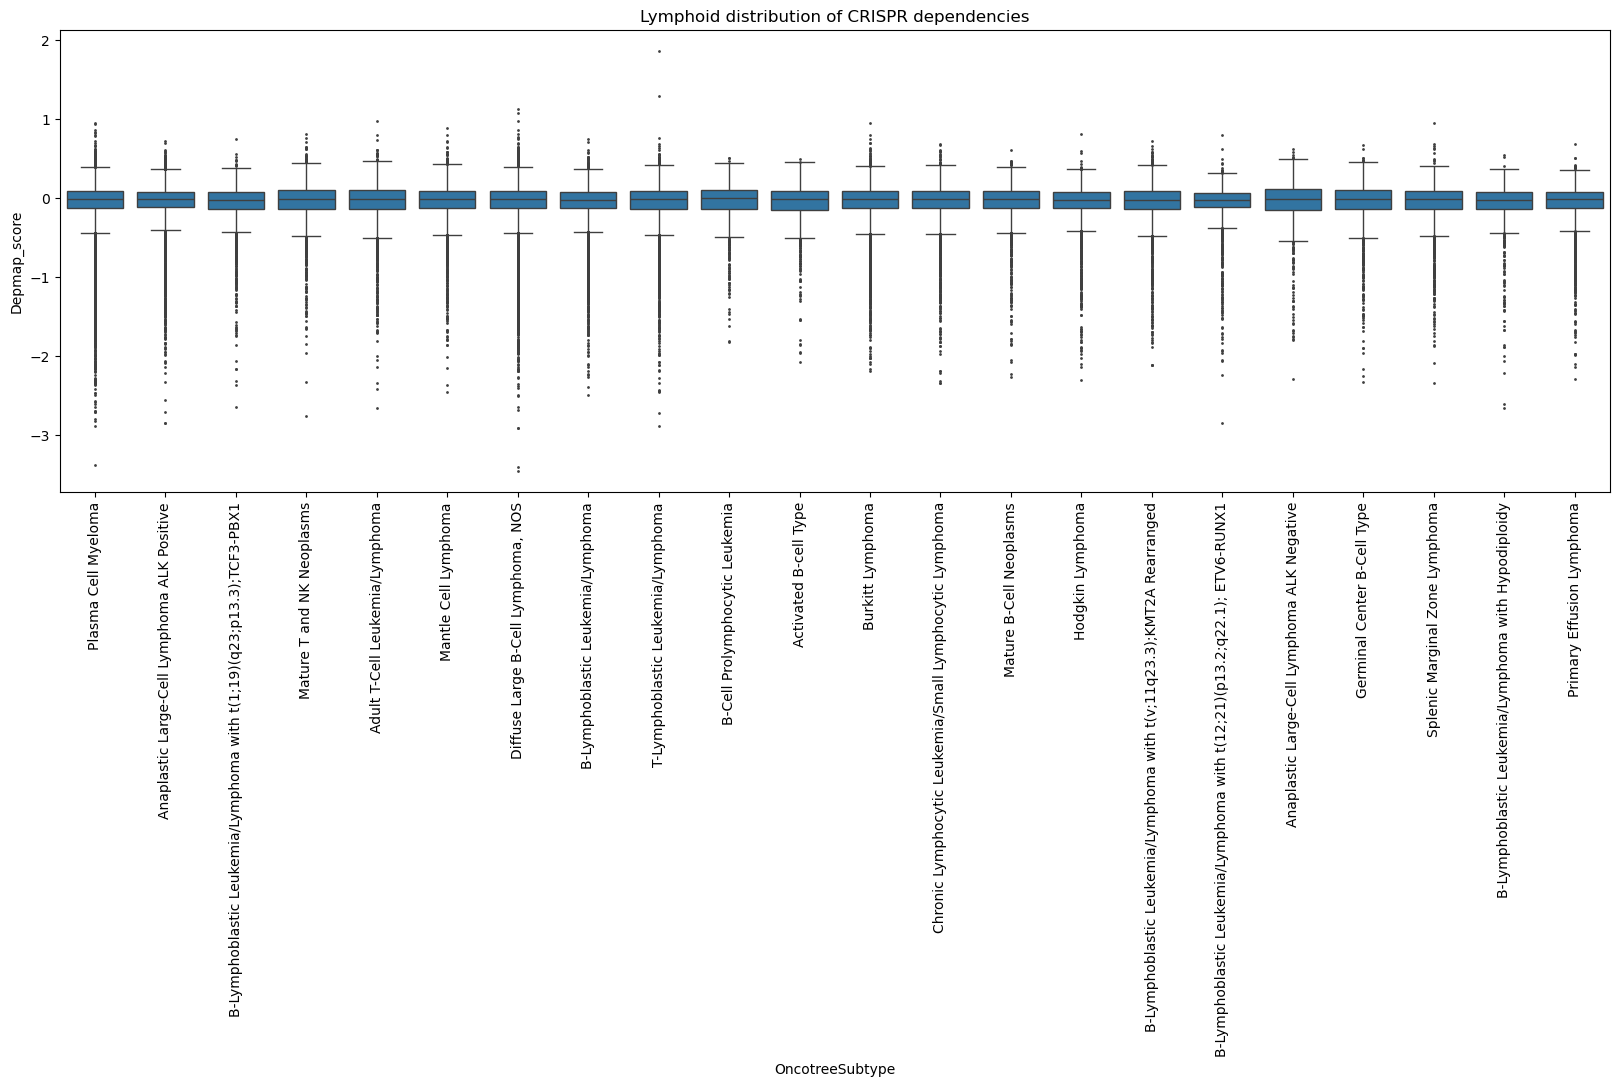

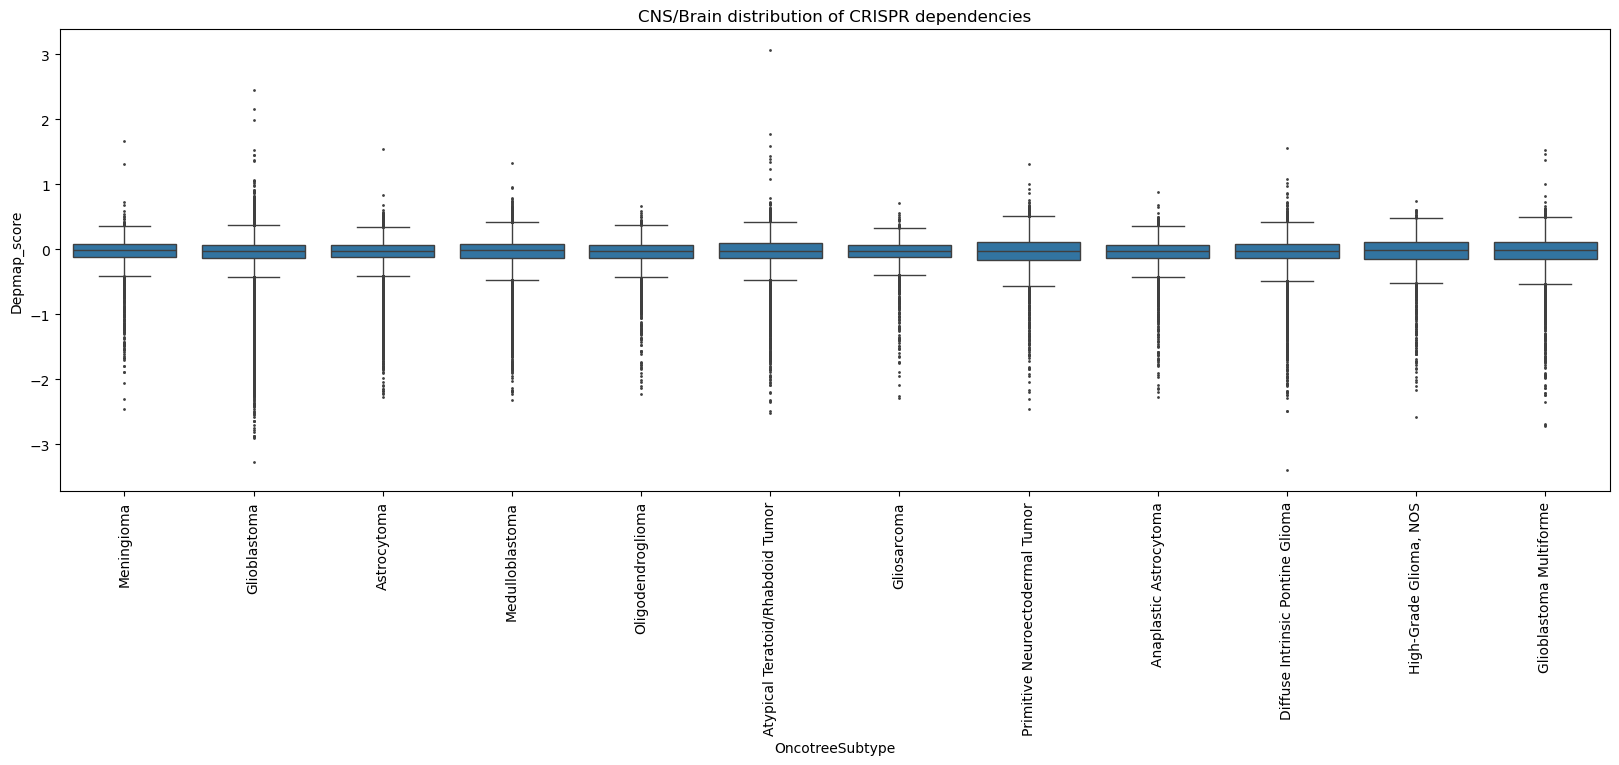

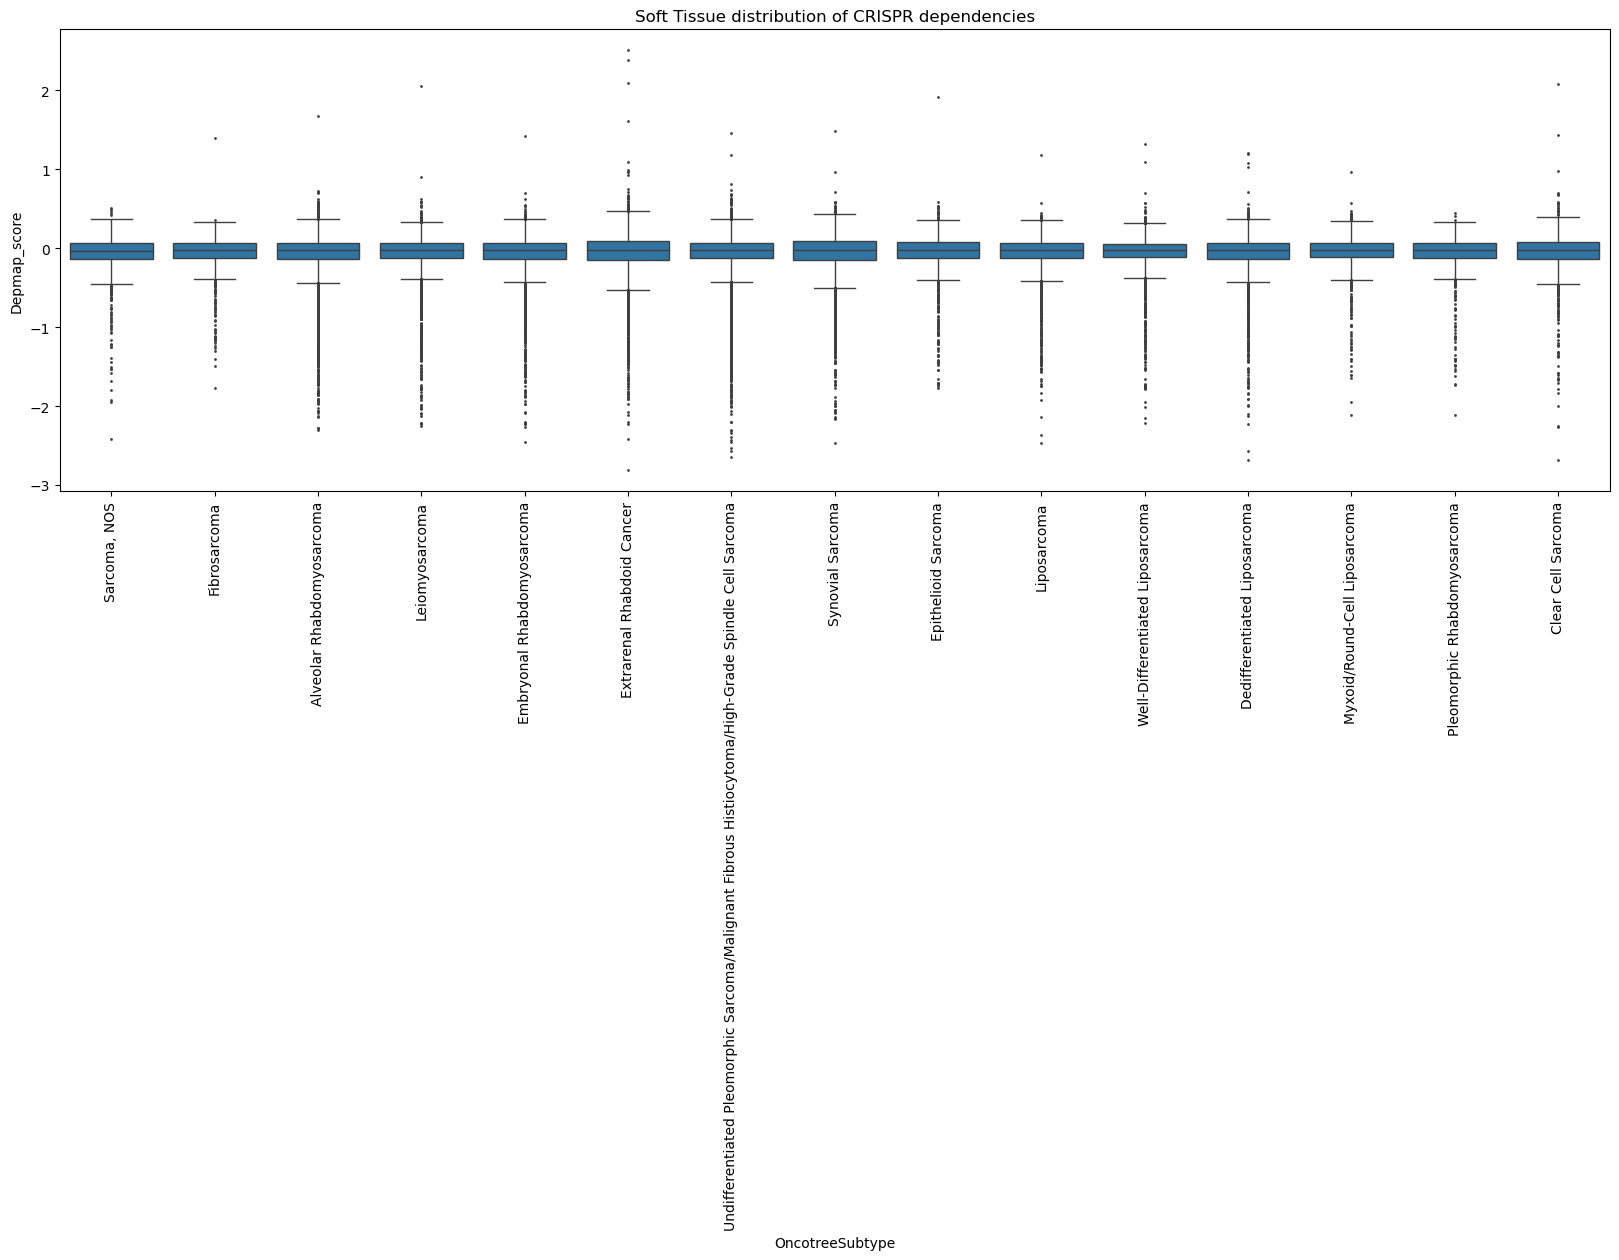

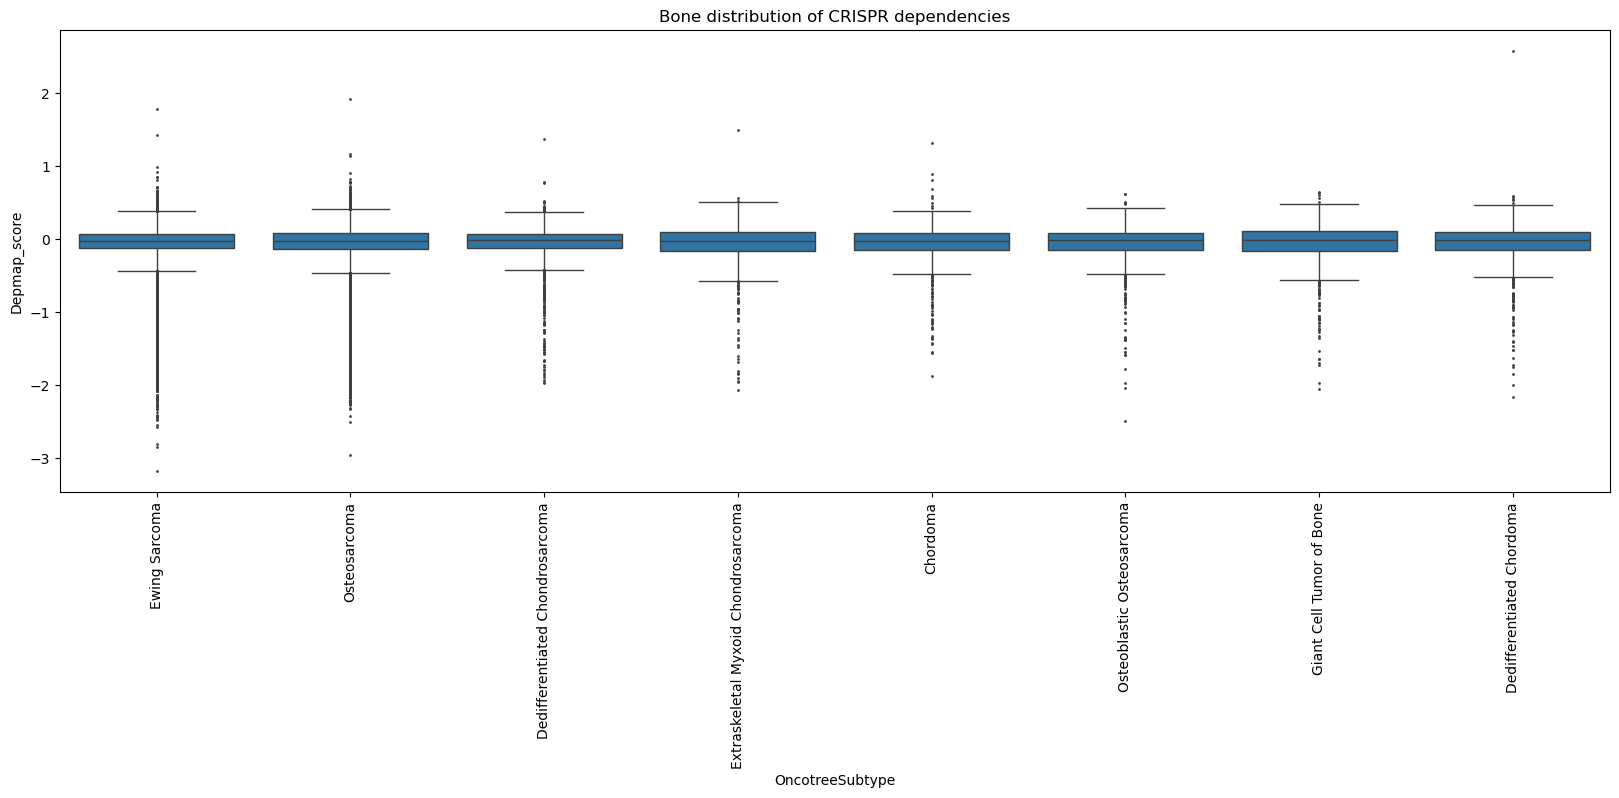

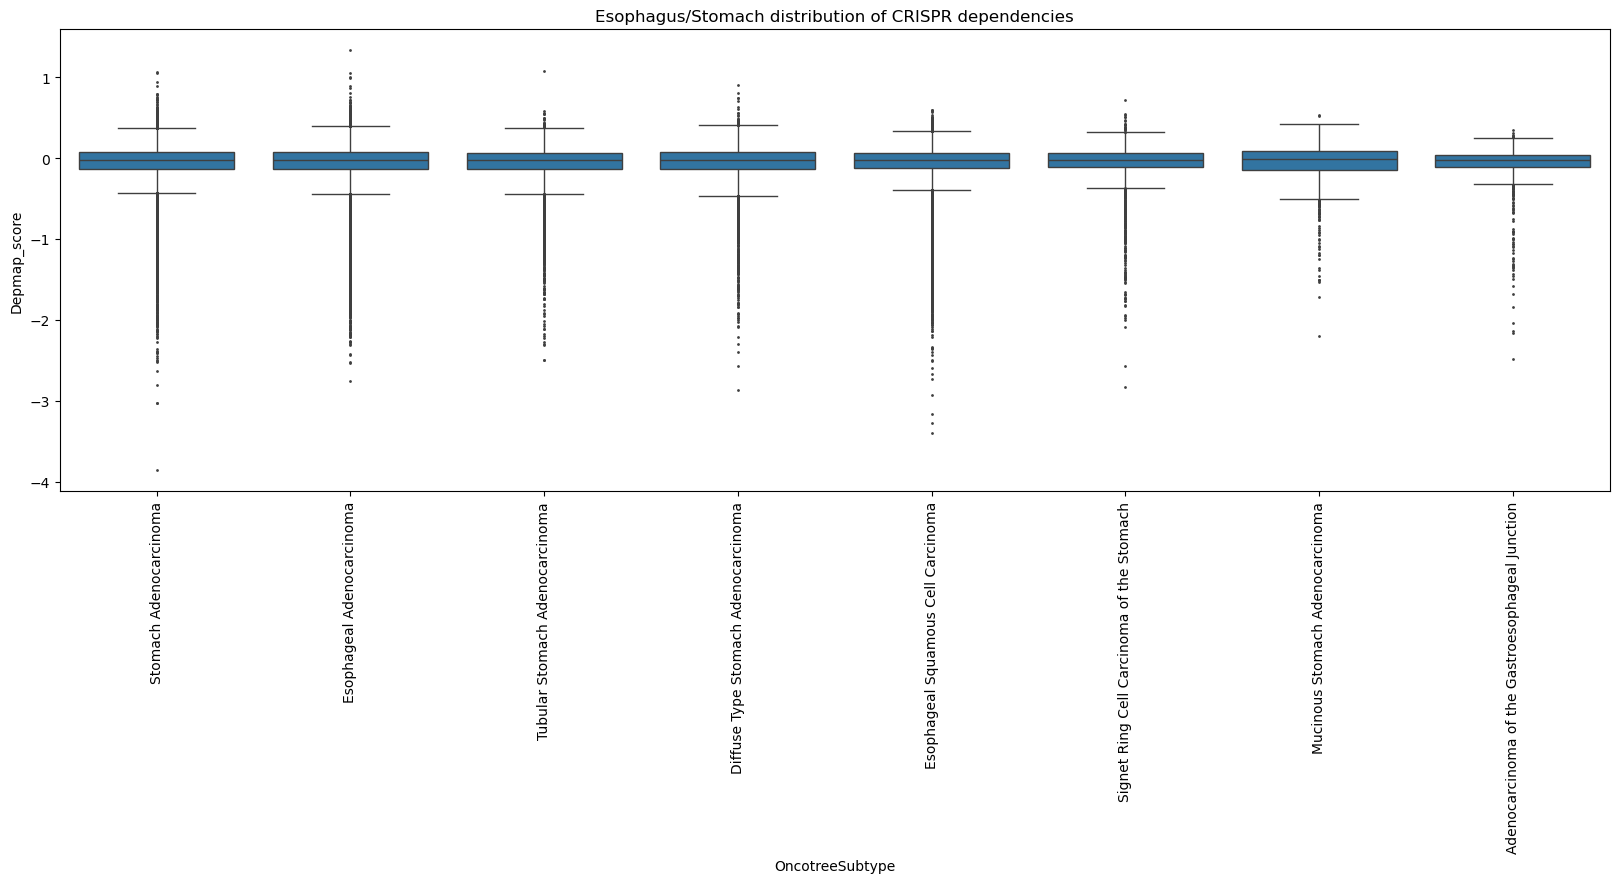

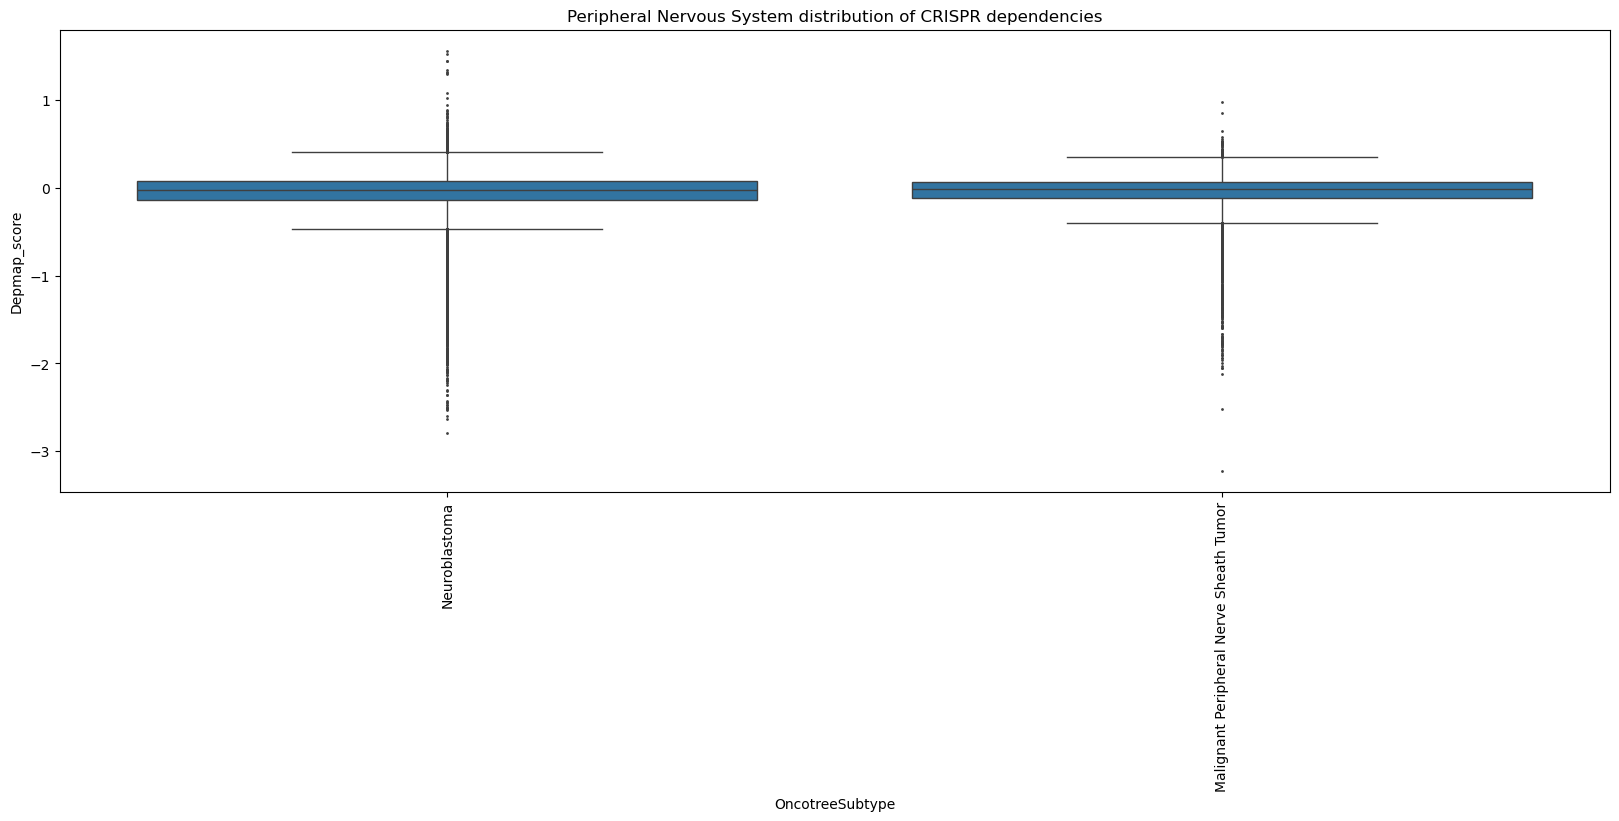

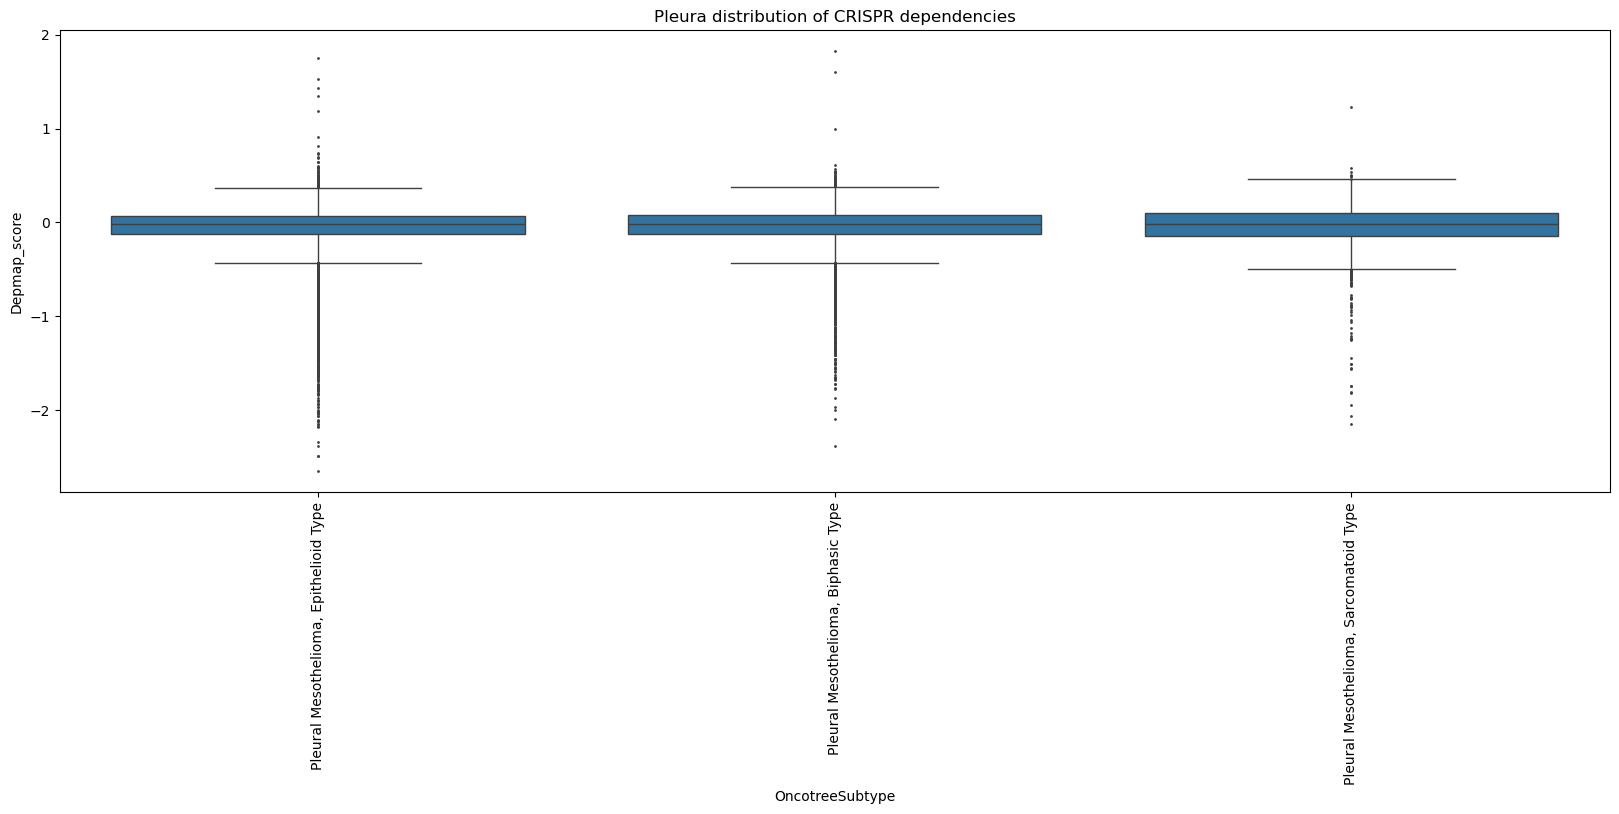

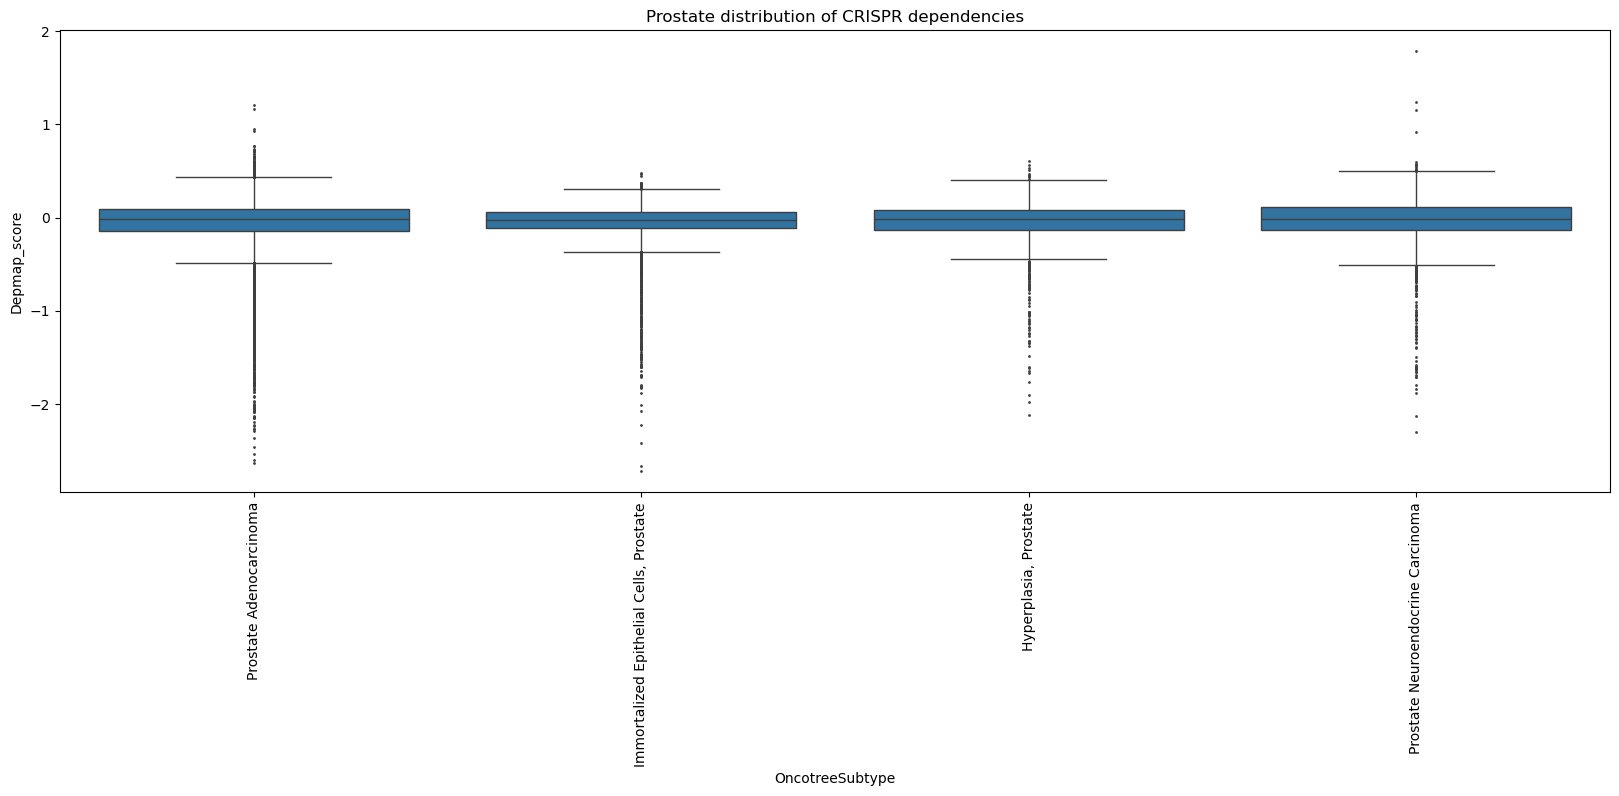

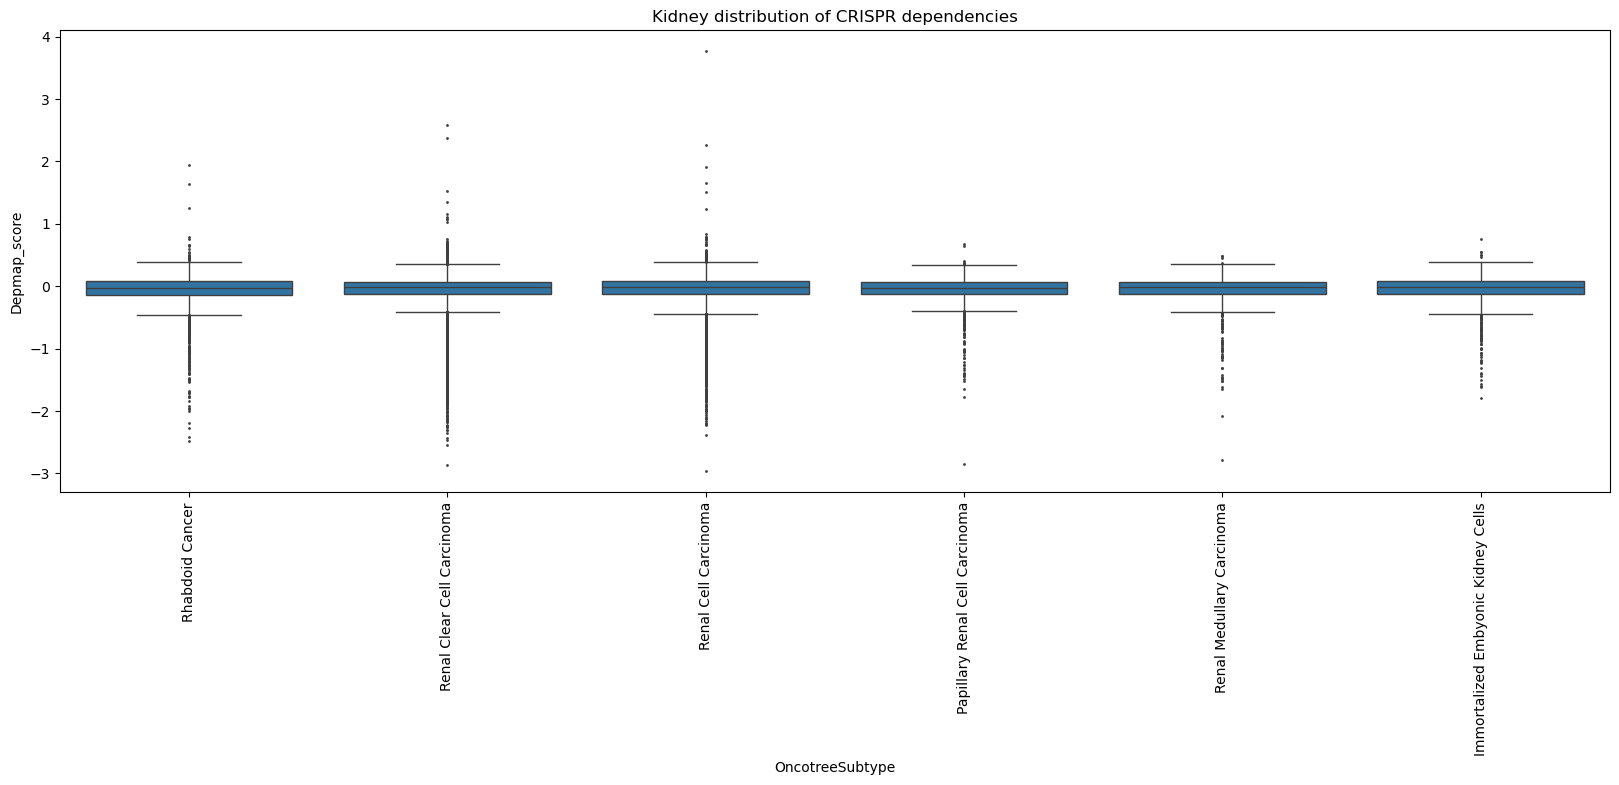

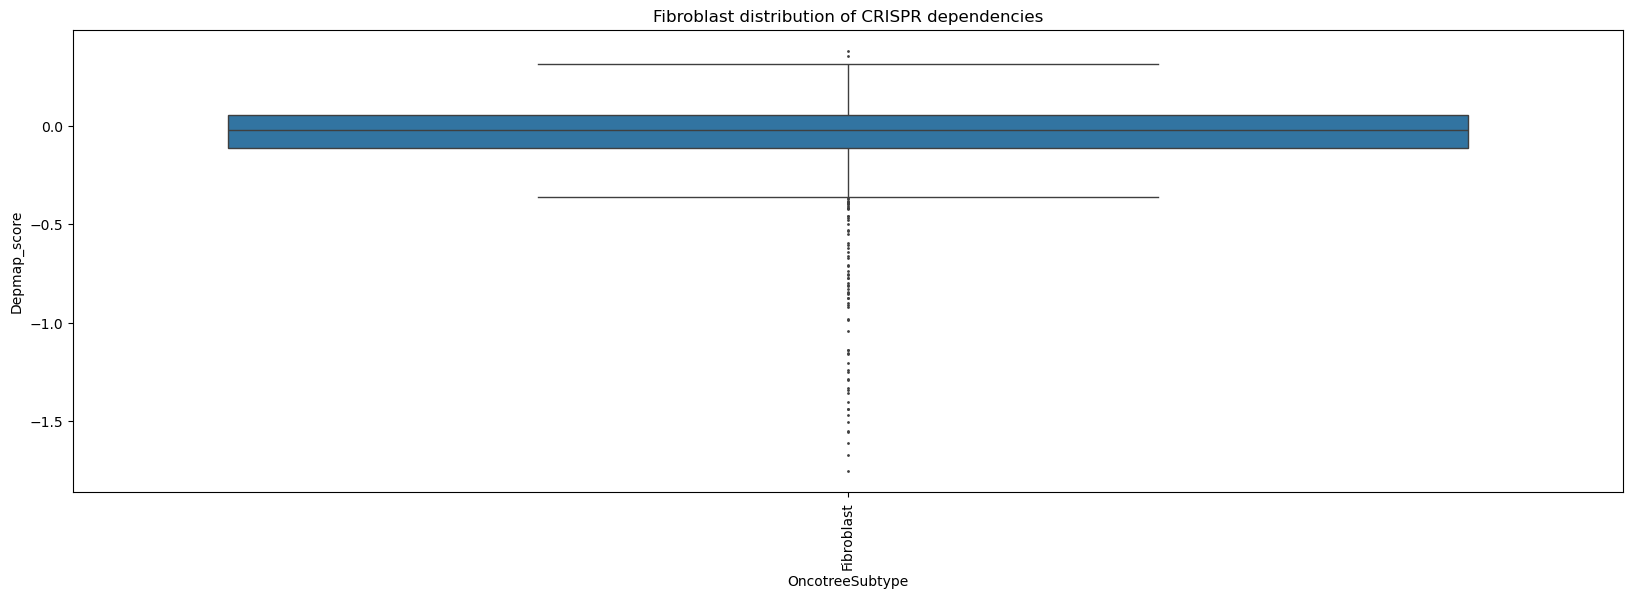

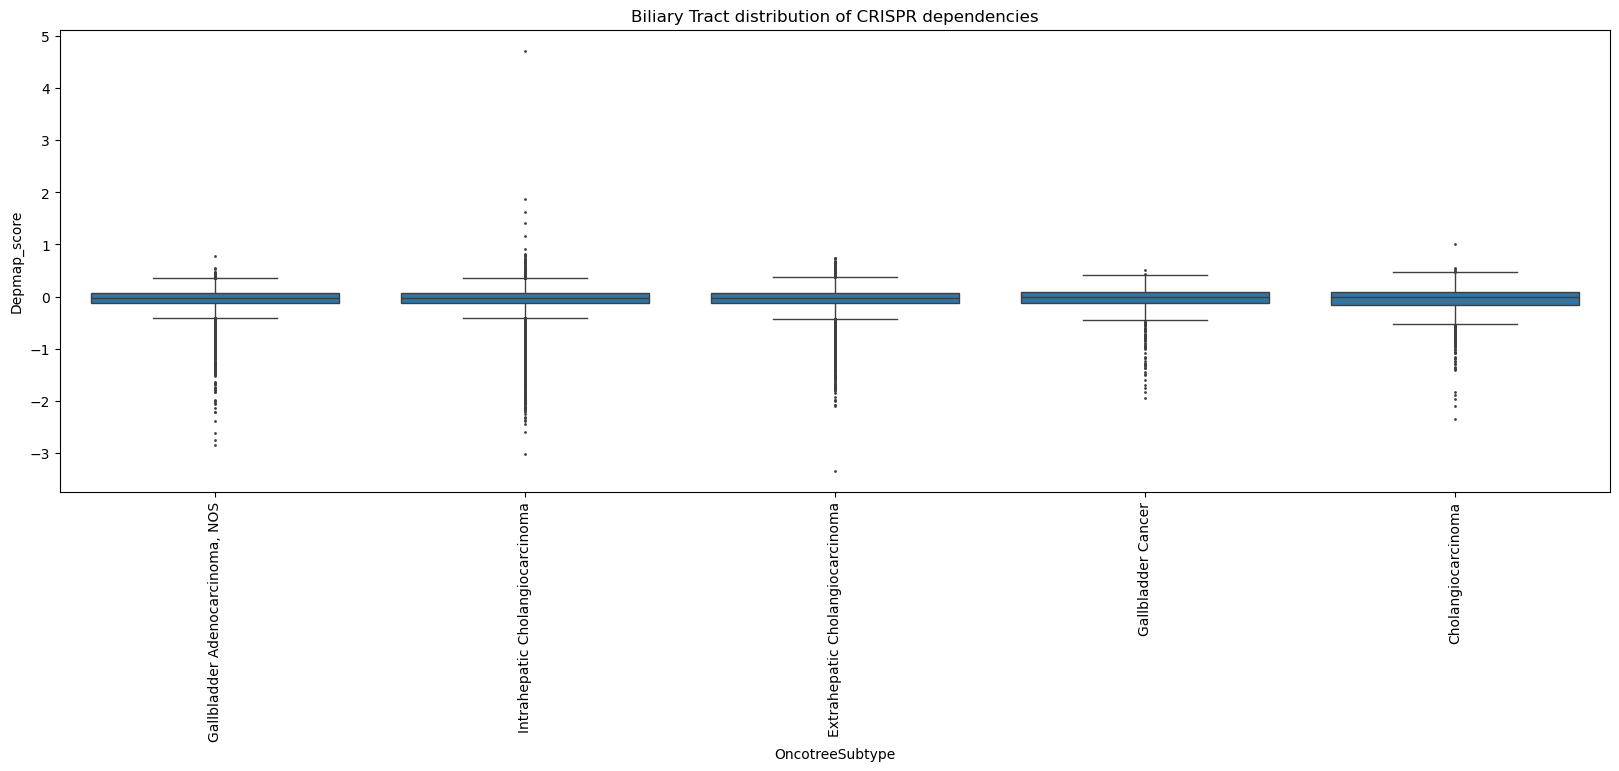

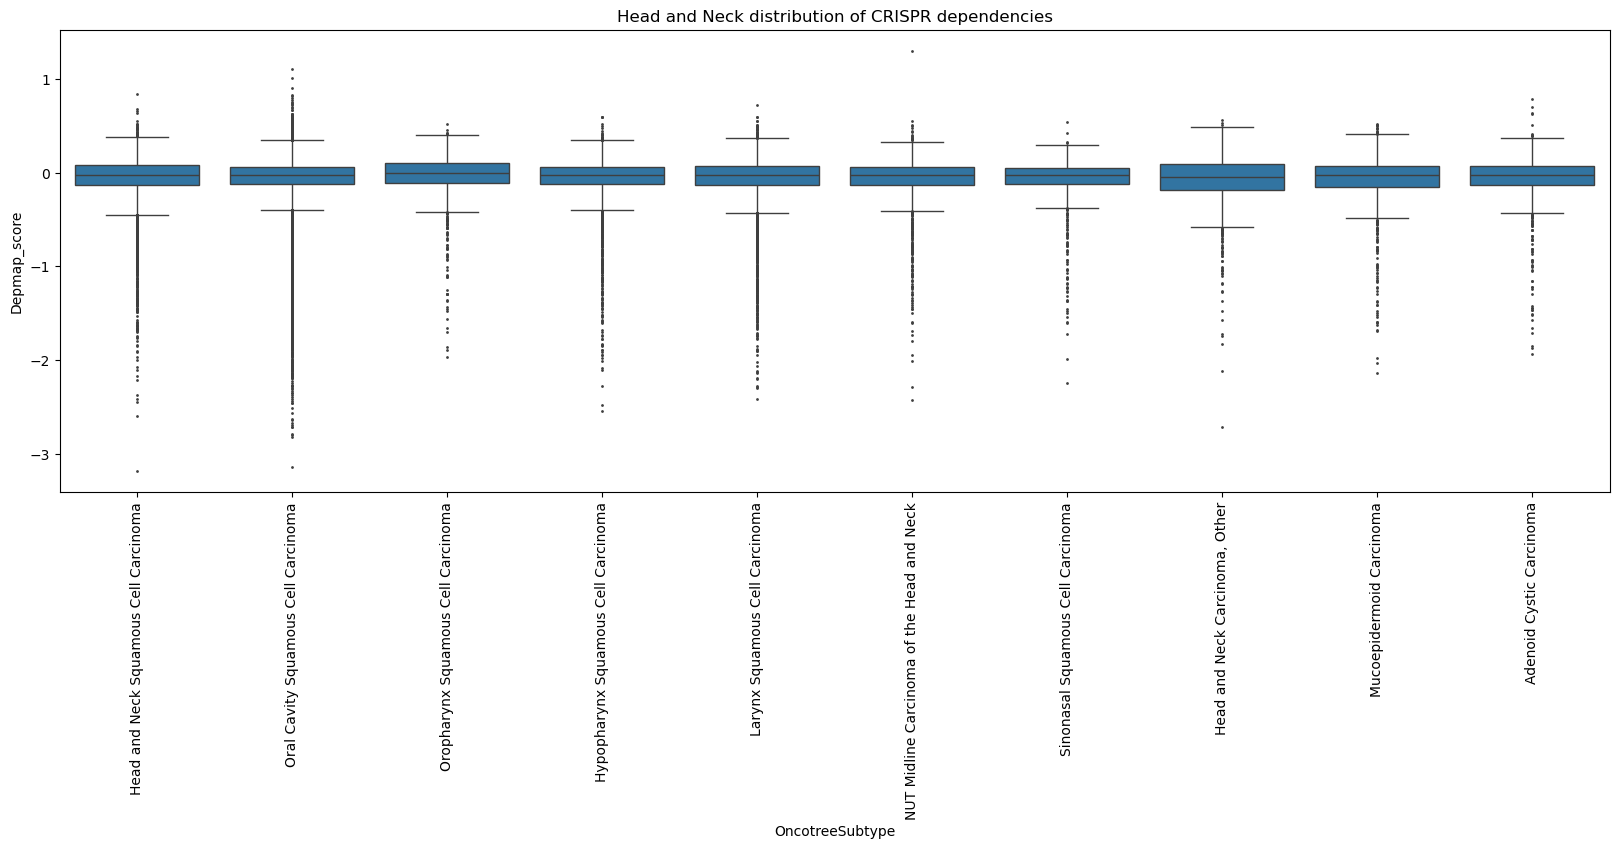

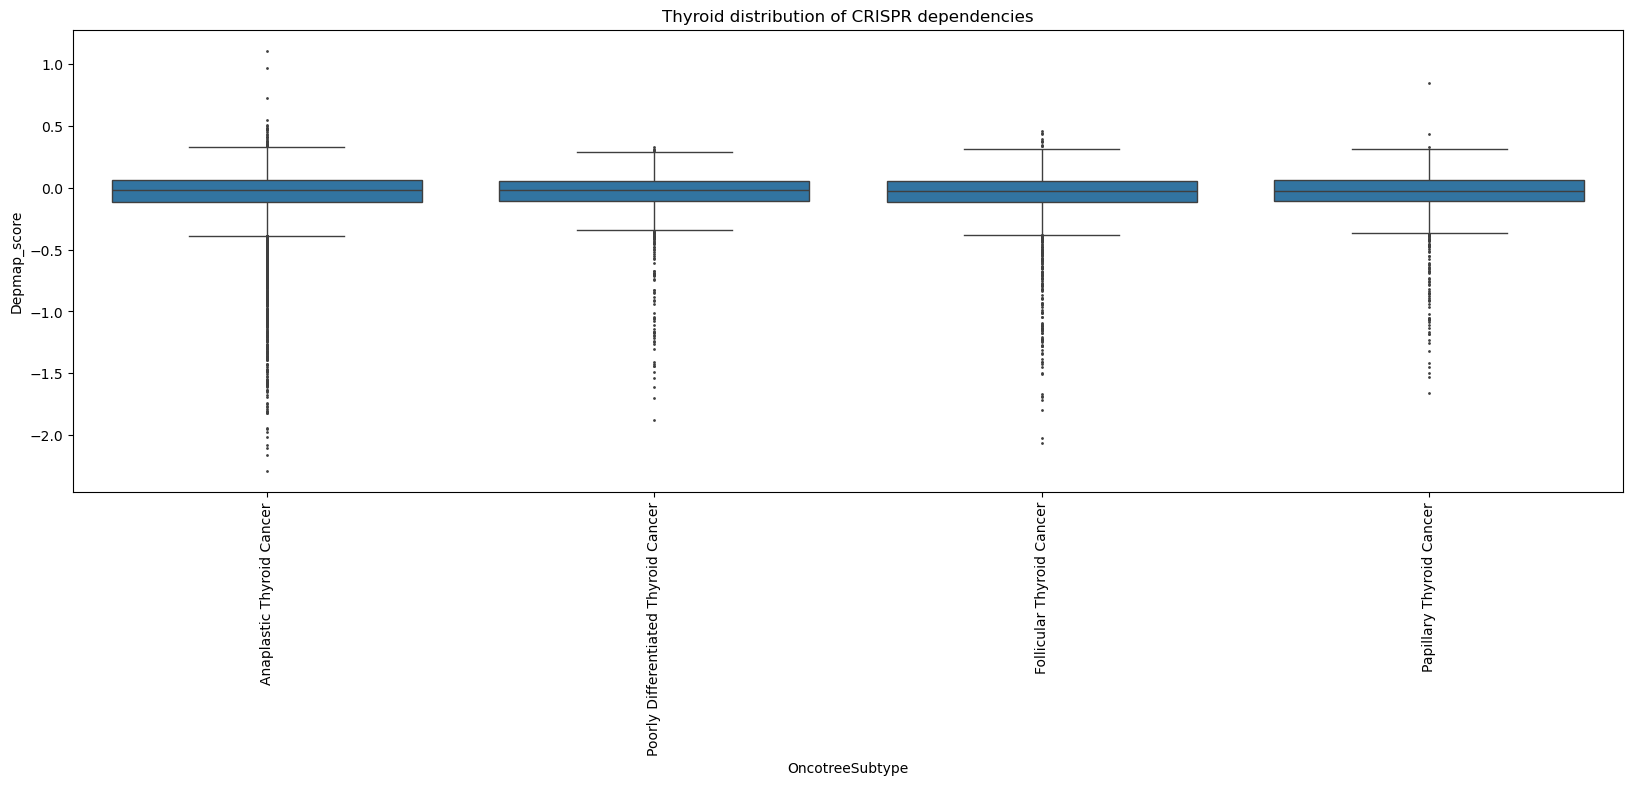

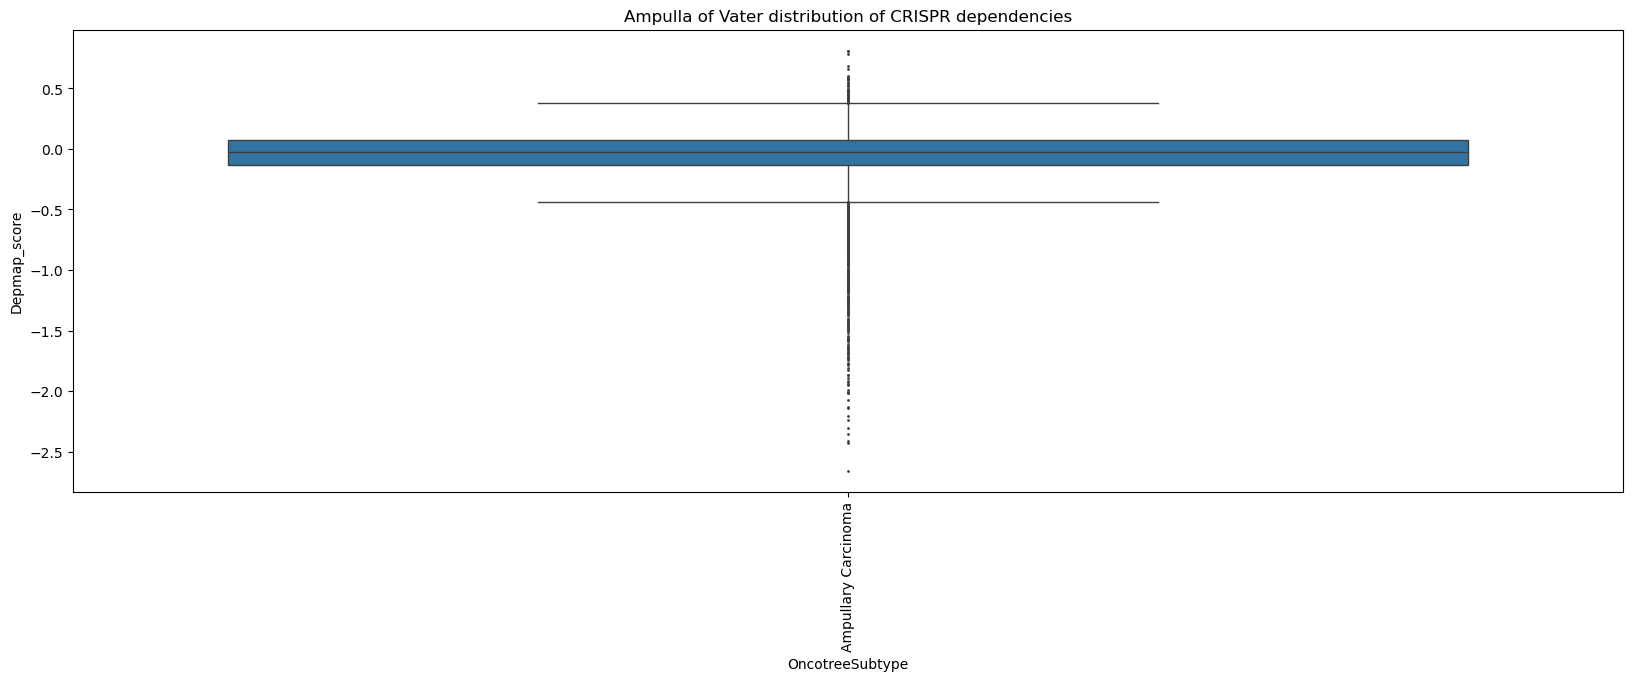

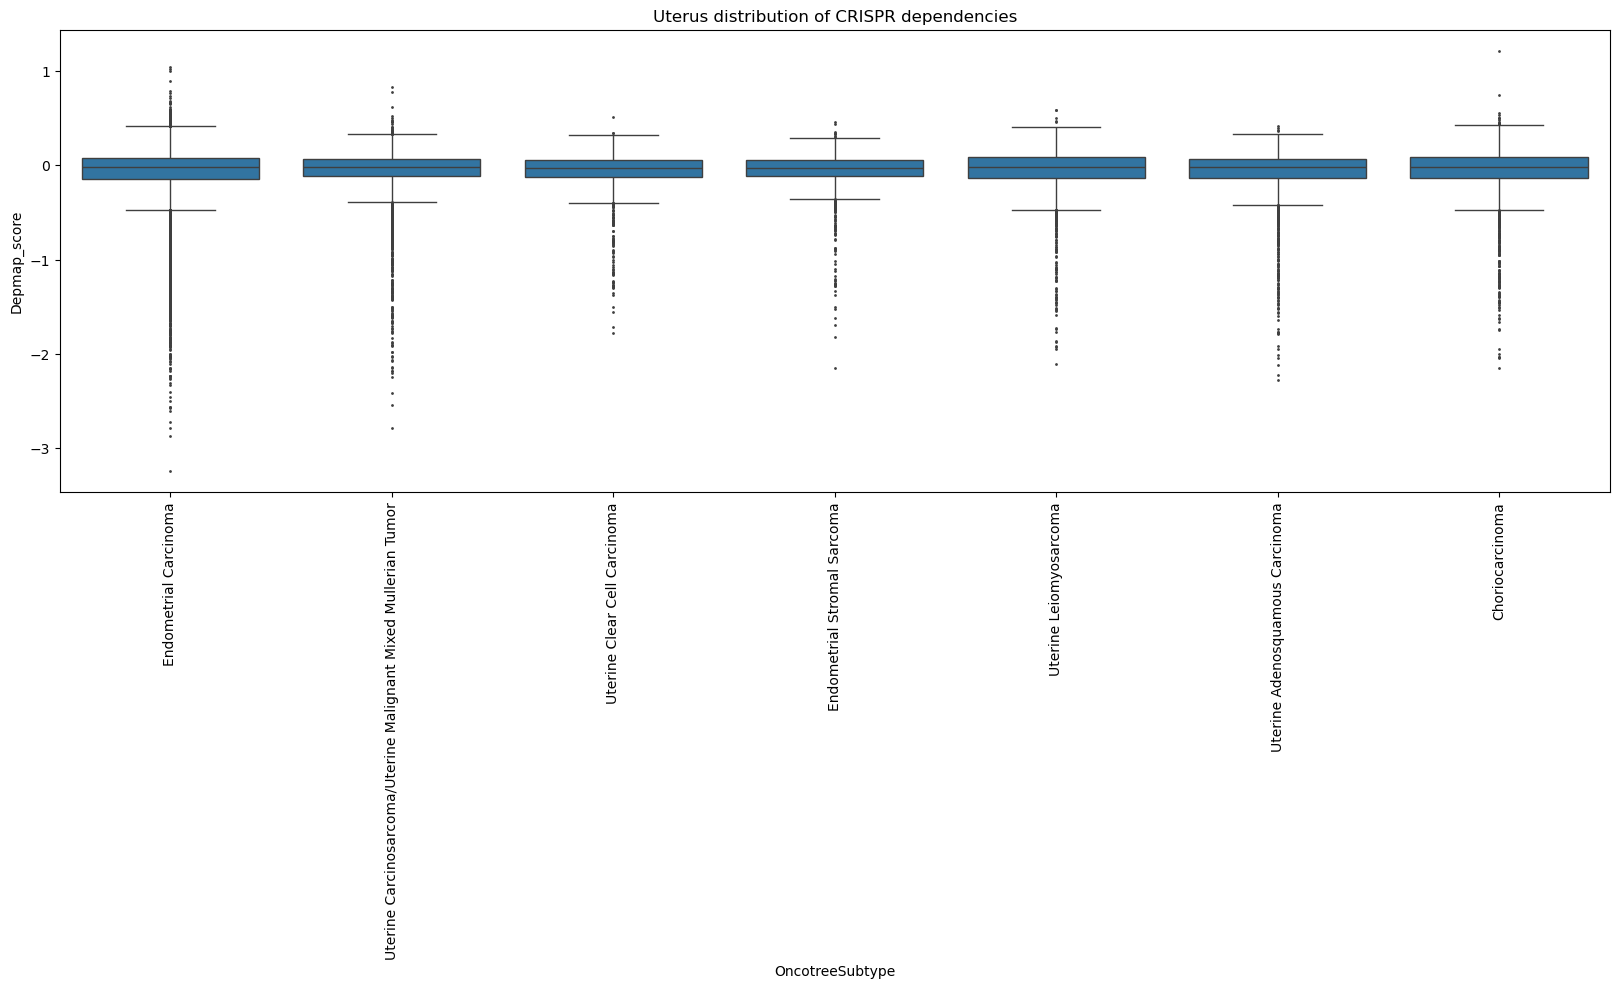

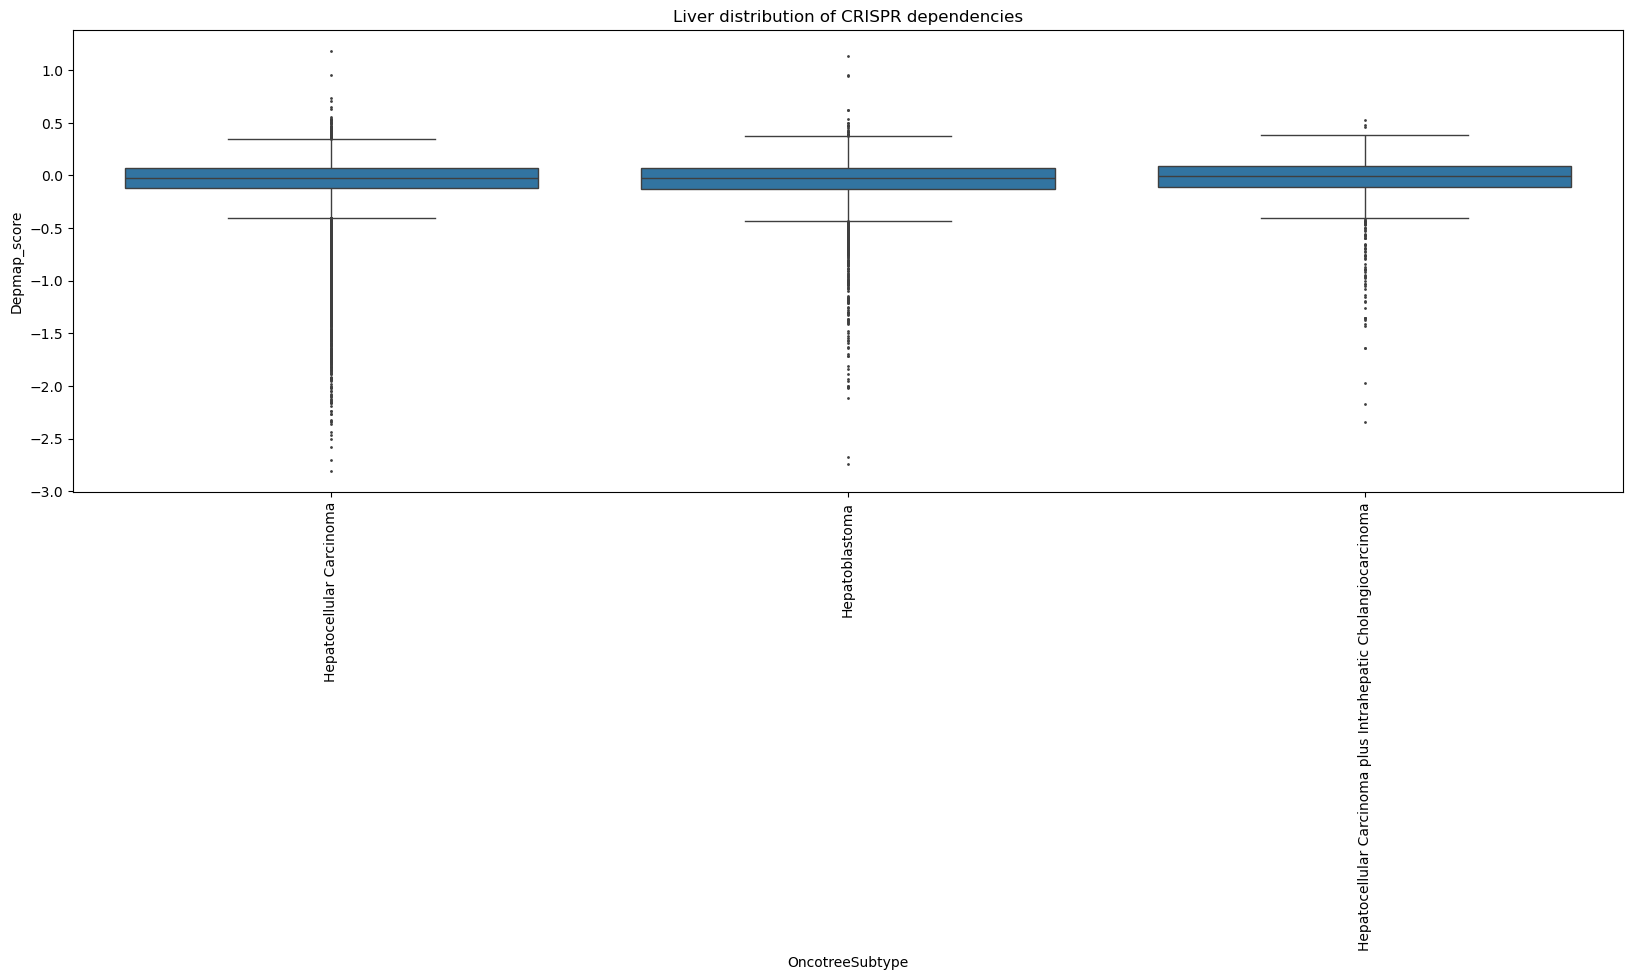

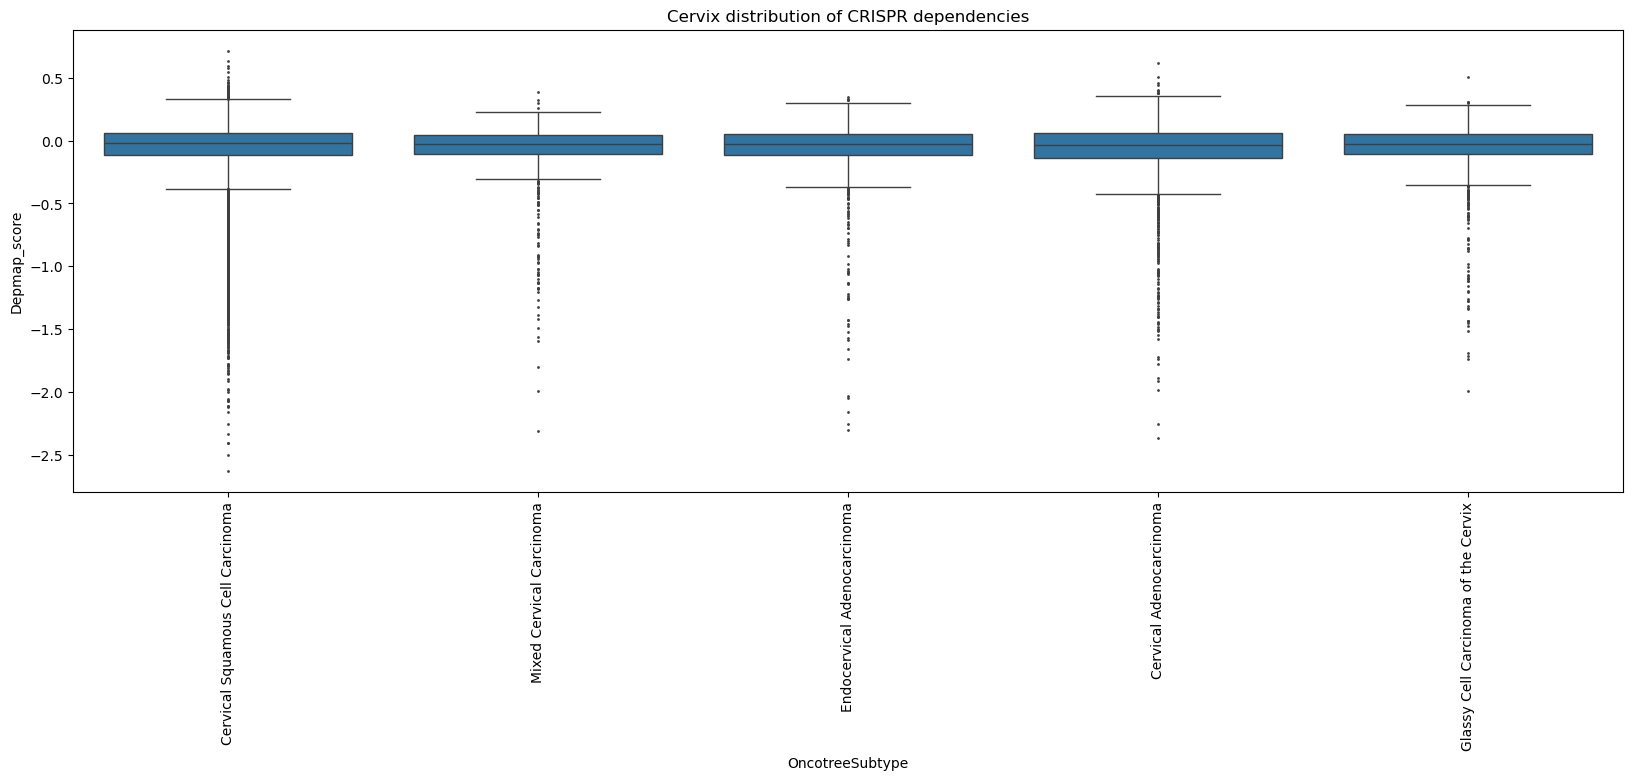

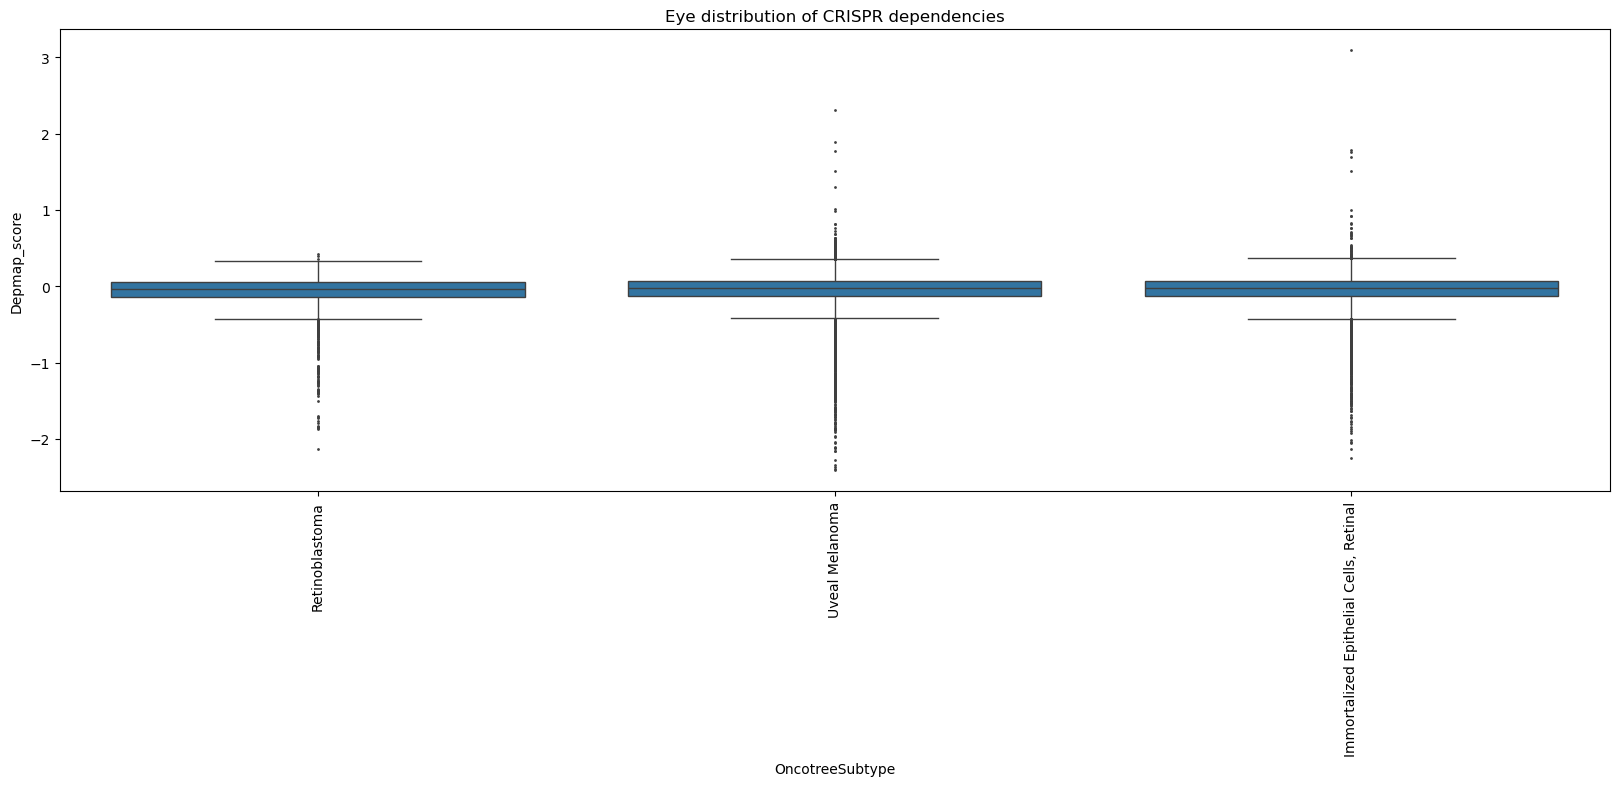

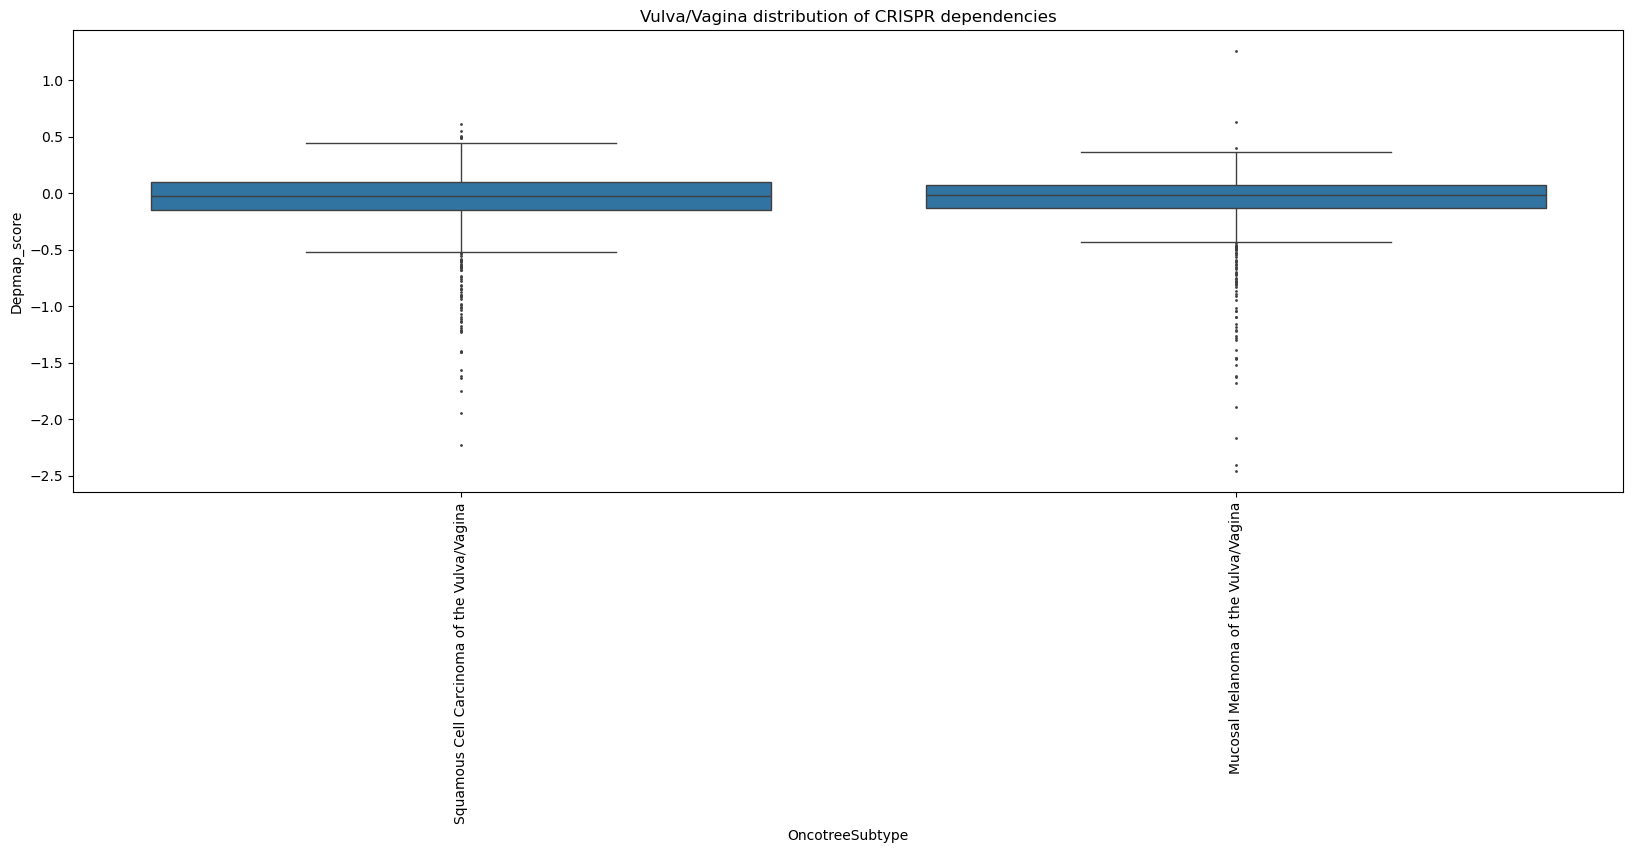

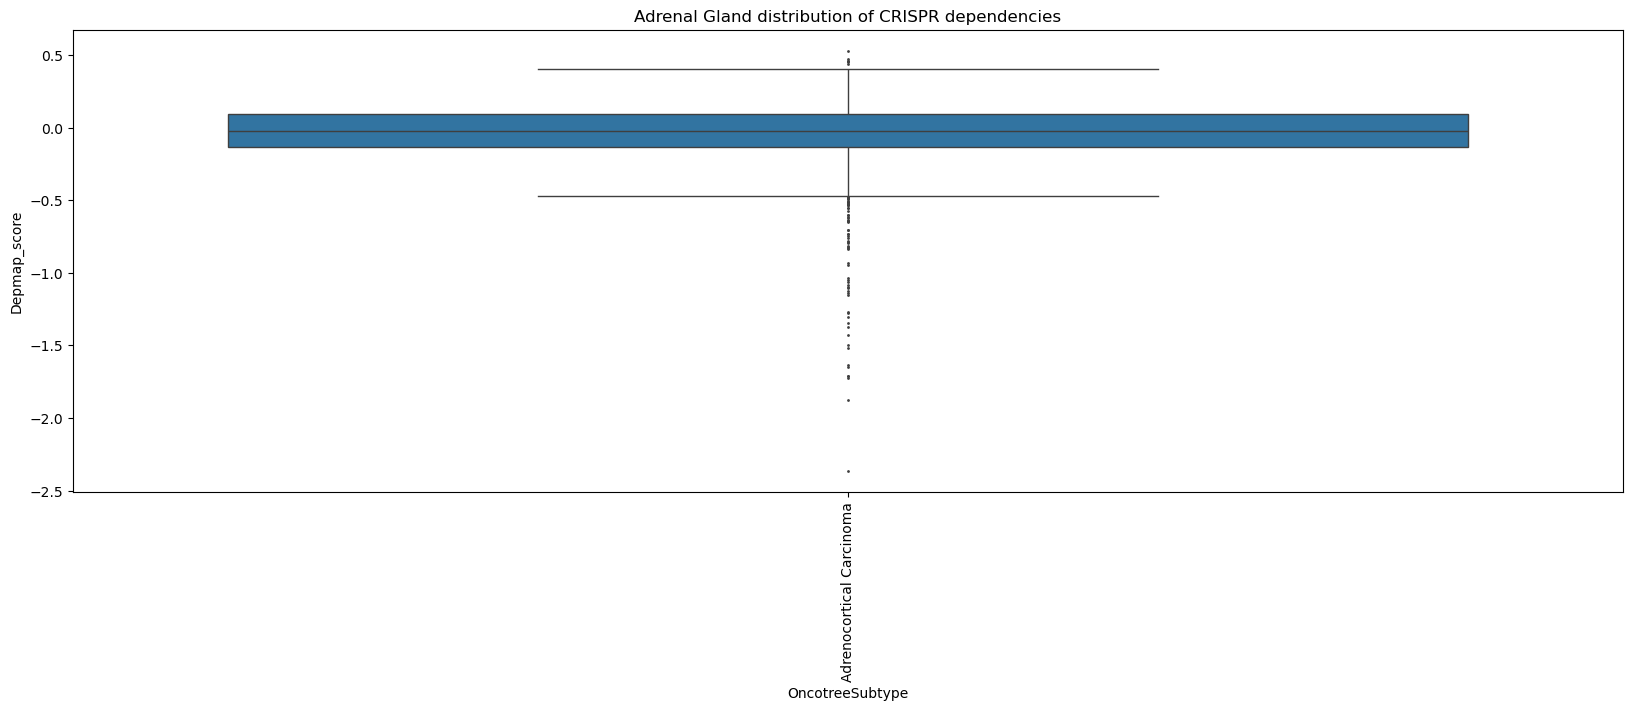

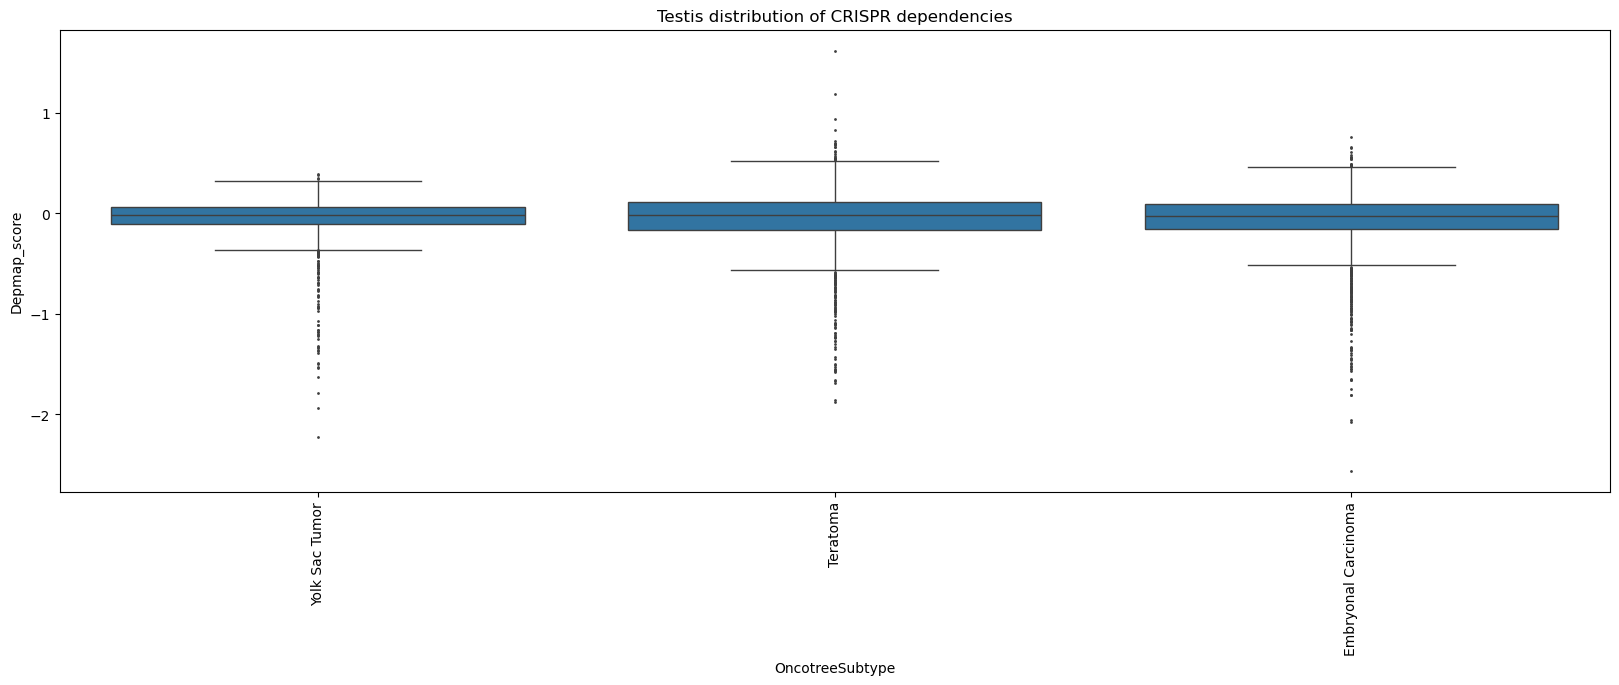

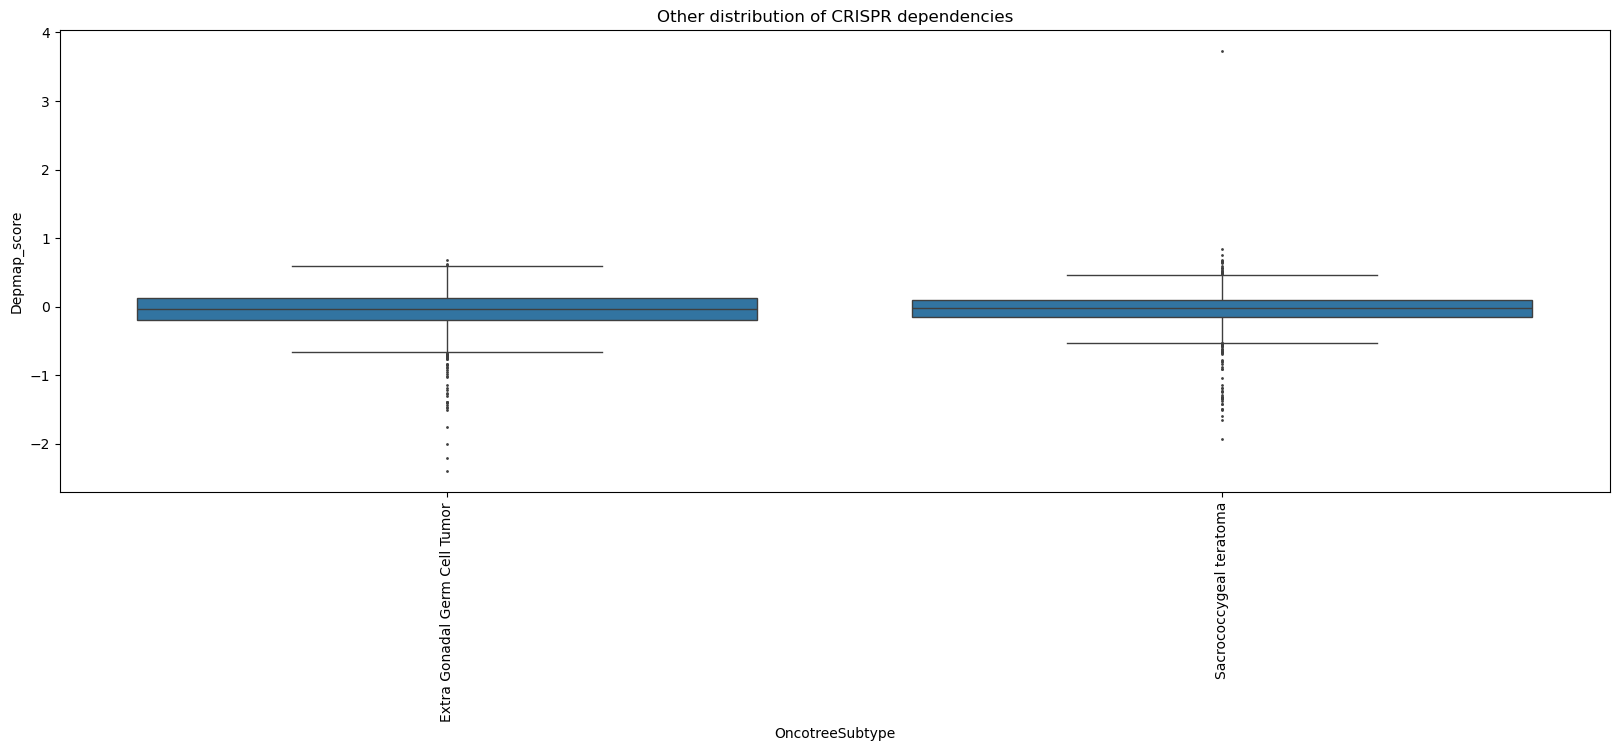

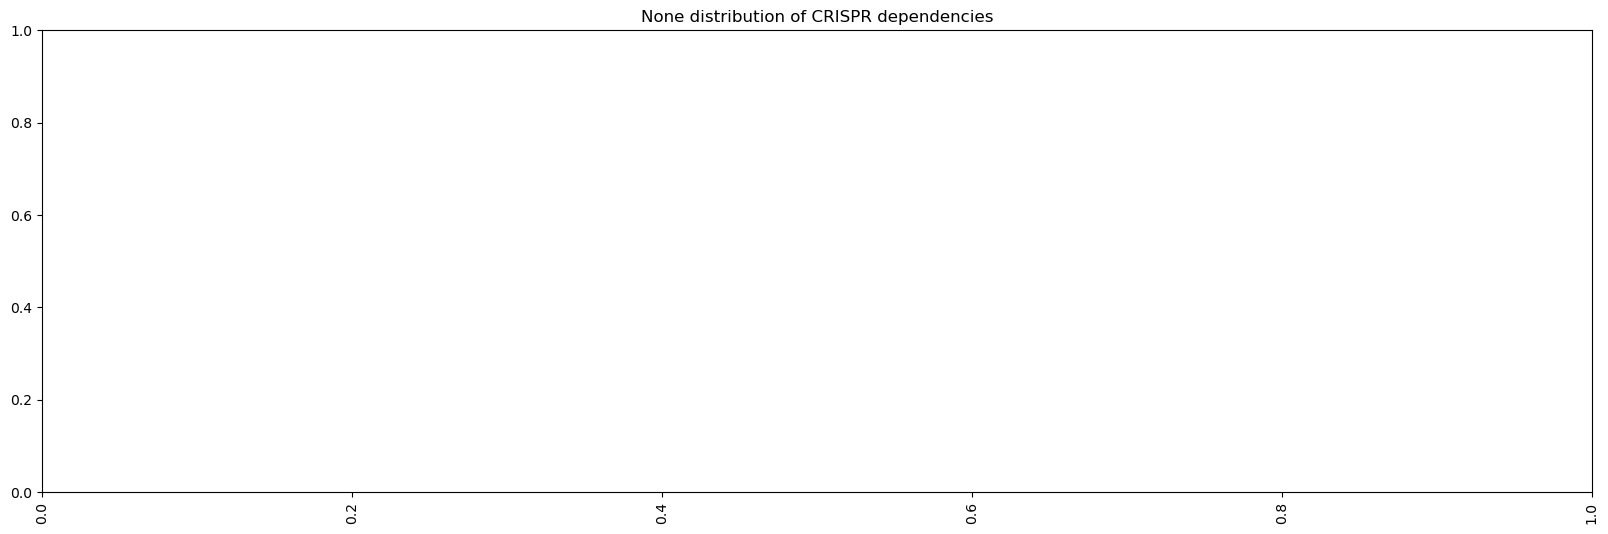

In [37]:
for lineage in crispr_dependencies_long['OncotreeLineage'].unique():
    make_boxplots(lineage)

In [39]:
crispr_dependencies_long

,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,TF,Depmap_score
0,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,TFAP2A,0.032275
1,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.145169
2,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.171513
3,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,TFAP2A,-0.073170
4,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,TFAP2A,0.224490
...,...,...,...,...,...,...
2118534,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,TBXT,0.105370
2118535,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,TBXT,0.077086
2118536,ACH-003587,531MII,Bone,Osteosarcoma,TBXT,0.013758
2118537,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,TBXT,0.069626


In [40]:
crispr_dependencies_long.dtypes


ModelID             object
CellLineName        object
OncotreeLineage     object
OncotreeSubtype     object
TF                  object
Depmap_score       float64
dtype: object

In [41]:
crispr_dependencies_long.shape

(2118539, 6)

In [42]:
df_dict = {lineage: data for lineage, data in crispr_dependencies_long.groupby("OncotreeLineage")}


In [43]:
df_dict

{'Adrenal Gland':             ModelID CellLineName OncotreeLineage           OncotreeSubtype  \
 803      ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 2176     ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 3549     ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 4922     ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 6295     ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 ...             ...          ...             ...                       ...   
 2112477  ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 2113850  ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 2115223  ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 2116596  ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 2117969  ACH-001401        SW-13   Adrenal Gland  Adrenocortical Carcinoma   
 
              TF  Depmap_score  


In [58]:
import os

# Define a safe directory to save the files
output_dir = "OncotreeLineage_Files"

os.makedirs(output_dir, exist_ok=True)

# Save each dataframe safely
for lineage, data in df_dict.items():
    safe_lineage = "".join(c if c.isalnum() or c in "_-" else "_" for c in lineage)  # Remove unsafe characters
    filename = os.path.join(output_dir, f"{safe_lineage}.csv")  # Save in the directory
    data.to_csv(filename, index=False)

print(f"Files saved in: {output_dir}")

Files saved in: OncotreeLineage_Files


In [44]:
median_scores_TF_df = crispr_dependencies_long.groupby(["OncotreeLineage","TF"])["Depmap_score"].median().reset_index()

median_scores_TF_df.rename(columns={"Depmap_score": "Median_Depmap_Score"}, inplace=True)

median_scores_TF_df


,OncotreeLineage,TF,Median_Depmap_Score
0,Adrenal Gland,ADNP,-0.099758
1,Adrenal Gland,ADNP2,0.109624
2,Adrenal Gland,AEBP1,-0.067829
3,Adrenal Gland,AEBP2,0.093067
4,Adrenal Gland,AHCTF1,-1.711097
...,...,...,...
46285,Vulva/Vagina,ZUP1,0.068009
46286,Vulva/Vagina,ZXDA,-0.081327
46287,Vulva/Vagina,ZXDB,0.118833
46288,Vulva/Vagina,ZXDC,-0.080798


In [45]:
median_scores_TF_df.shape


(46290, 3)

In [47]:
crispr_dependencies_long = crispr_dependencies_long.drop(columns=["Median_Depmap_Score"], errors="ignore")
crispr_dependencies_long = crispr_dependencies_long.merge(median_scores_TF_df,on=["OncotreeLineage", "TF"], how="left")
crispr_dependencies_long

,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,TF,Depmap_score,Median_Depmap_Score
0,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,TFAP2A,0.032275,-0.017898
1,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.145169,0.074627
2,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,TFAP2A,0.171513,0.074627
3,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,TFAP2A,-0.073170,0.044542
4,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,TFAP2A,0.224490,0.044542
...,...,...,...,...,...,...,...
2118534,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,TBXT,0.105370,0.095378
2118535,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,TBXT,0.077086,0.097938
2118536,ACH-003587,531MII,Bone,Osteosarcoma,TBXT,0.013758,0.095378
2118537,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,TBXT,0.069626,0.066406


In [48]:
crispr_dependencies_long = crispr_dependencies_long[crispr_dependencies_long["Median_Depmap_Score"] < 0]
crispr_dependencies_long


,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,TF,Depmap_score,Median_Depmap_Score
0,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,TFAP2A,0.032275,-0.017898
7,ACH-000013,ONCO-DG-1,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,TFAP2A,-0.018923,-0.017898
8,ACH-000014,Hs 294T,Skin,Melanoma,TFAP2A,0.027426,-0.226460
10,ACH-000017,SK-BR-3,Breast,Invasive Breast Carcinoma,TFAP2A,-0.280697,-0.141995
12,ACH-000019,MCF7,Breast,Invasive Breast Carcinoma,TFAP2A,-0.139657,-0.141995
...,...,...,...,...,...,...,...
2117160,ACH-003573,C337,Bone,Osteosarcoma,ZUP1,-0.140576,-0.026225
2117161,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,ZUP1,0.005381,-0.026225
2117162,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,ZUP1,0.016575,-0.033528
2117163,ACH-003587,531MII,Bone,Osteosarcoma,ZUP1,0.058059,-0.026225


In [49]:
crispr_dependencies_long_TF_below_median = crispr_dependencies_long[crispr_dependencies_long["Depmap_score"] < crispr_dependencies_long["Median_Depmap_Score"]]
crispr_dependencies_long_TF_below_median
crispr_dependencies_long_TF_below_median.to_csv("filtered_crispr_dependencies.csv", index=False)


In [50]:
df_dict_TF_below_medain = {lineage: data for lineage, data in crispr_dependencies_long_TF_below_median.groupby("OncotreeLineage")}

In [51]:
import os

# Define a safe directory to save the files
output_dir = "OncotreeLineage_Files_TF_below_median"

os.makedirs(output_dir, exist_ok=True)

# Save each dataframe safely
for lineage, data in df_dict_TF_below_medain.items():
    safe_lineage = "".join(c if c.isalnum() or c in "_-" else "_" for c in lineage)  # Remove unsafe characters
    filename = os.path.join(output_dir, f"{safe_lineage}.csv")  # Save in the directory
    data.to_csv(filename, index=False)

print(f"Files saved in: {output_dir}")

Files saved in: OncotreeLineage_Files_TF_below_median


In [78]:
gene_expr= pd.read_pickle("pydata/tpmlog2p1.pkl")
gene_expr

,TFE3,MMADHC,PABPC1L,RELL2,GPT,GUSB,H4-16,DDB2,RPS4X,HINFP,...,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
ACH-000873,3.506205,3.584484,4.572699,2.137186,0.525915,5.041027,1.179124,4.345084,10.069657,2.869262,...,0.032995,3.748717,5.155622,-0.009160,1.952132,4.141739,-0.000116,3.782797,2.193078,0.245980
ACH-000860,4.089100,6.886964,4.430887,2.528341,0.117545,5.589460,1.053103,4.127051,10.209273,4.024218,...,0.023290,-0.160952,6.753527,-0.009160,1.357422,4.268943,-0.000116,4.690644,3.372848,0.417233
ACH-000439,3.165189,5.836121,1.049685,3.957850,0.308481,6.517316,0.317849,4.238008,11.637030,4.678546,...,-0.016486,-0.189162,6.883302,2.206492,3.058301,4.573945,-0.000116,4.000853,2.199302,0.052468
ACH-000318,3.603682,5.844594,4.082083,2.102328,0.390166,5.082609,2.210189,4.881627,9.159418,2.489161,...,-0.016486,2.922211,5.594495,-0.009160,2.271837,3.791668,-0.000116,0.273937,3.222723,0.321795
ACH-001142,5.995286,7.071005,3.995839,2.349655,-0.056134,4.511908,2.253969,3.913061,10.173268,3.719160,...,0.042608,3.458342,7.431706,-0.009160,2.232625,4.852927,-0.000116,4.257783,2.358115,0.570824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003180,5.165957,7.735123,1.888620,1.447676,0.305600,6.416978,0.369623,4.781201,9.478081,2.966378,...,0.097491,4.816006,6.277112,0.002097,2.609723,5.097519,0.023647,4.856428,2.661060,-0.016156
ACH-001979,4.985783,7.665280,3.026326,3.032295,0.305600,6.804347,0.735648,5.629513,11.373898,2.688530,...,0.018964,4.843341,7.279101,0.002097,2.272606,5.139305,-0.000713,4.964760,2.754223,0.492046
ACH-003274,3.463985,6.899029,2.126371,3.764047,0.340686,5.714290,0.450048,3.300497,10.796507,3.748022,...,0.018964,0.191719,6.945938,0.002097,2.520798,5.038073,0.011527,4.214451,3.669716,0.051750
ACH-002748,4.142447,6.848186,1.440711,3.091984,2.097855,7.121441,1.067238,2.825501,9.164170,3.436956,...,0.018964,2.835515,5.897340,0.002097,1.828925,5.208657,-0.000713,2.871649,2.019966,2.086770


In [70]:
gene_expr.columns

Index(['TFE3', 'MMADHC', 'PABPC1L', 'RELL2', 'GPT', 'GUSB', 'H4-16', 'DDB2',
       'RPS4X', 'HINFP',
       ...
       'OR2A42', 'HOXB7', 'NSA2', 'UGT2B11', 'ZNF747', 'NAA60', 'MYH4', 'MTAP',
       'C14orf93', 'NR3C2'],
      dtype='object', length=19139)

In [63]:
E3_ligases = pd.read_excel("data/E3_ligase_list.xlsx", skiprows=1)

In [64]:
E3_ligases

,Symbol,HGNC,uniprot_ids,Confidence Score,Ge.et.al,UbiHub,UbiBrowser
0,AHCTF1,HGNC:24618,Q8WYP5,1,Yes,No,No
1,ODAD2,HGNC:25583,Q5T2S8,1,Yes,No,No
2,BAZ1A,HGNC:960,Q9NRL2,1,Yes,No,No
3,BAZ1B,HGNC:961,Q9UIG0,1,Yes,No,No
4,BPTF,HGNC:3581,Q12830,1,Yes,No,No
...,...,...,...,...,...,...,...
1070,PTPA,HGNC:9308,Q15257,1,No,No,Yes
1071,RSAD2,HGNC:30908,Q8WXG1,1,No,No,Yes
1072,TNFAIP3,HGNC:11896,P21580,1,No,No,Yes
1073,TOM1,HGNC:11982,O60784,1,No,No,Yes


In [68]:
E3_list = E3_ligases[["Symbol"]]

In [69]:
E3_list

,Symbol
0,AHCTF1
1,ODAD2
2,BAZ1A
3,BAZ1B
4,BPTF
...,...
1070,PTPA
1071,RSAD2
1072,TNFAIP3
1073,TOM1


In [71]:
E3_found = [E3 for E3 in E3_ligases["Symbol"] if E3 in gene_expr.columns]

In [77]:
len(E3_found)

1070

In [79]:
E3_expr = gene_expr[E3_found]
E3_expr

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,FAF2,NAT10,PRC1,MALT1,UCHL1,PTPA,RSAD2,TNFAIP3,TOM1,UBE2G1
ACH-000873,2.879136,3.041012,3.680269,4.037185,0.030007,5.356616,6.522379,2.542923,4.270947,1.984904,...,4.808157,4.851030,5.367397,2.176448,8.371465,5.086677,0.084441,1.425680,2.279007,4.087440
ACH-000860,4.504585,5.624291,5.240666,5.471781,0.030007,5.792237,7.605641,3.336071,4.525571,2.080899,...,4.900607,4.758510,7.224054,2.784538,5.559487,6.944998,2.017100,1.074665,3.255804,4.088215
ACH-000439,3.268524,4.012726,4.122294,3.902031,0.107769,4.921870,7.271360,3.289881,4.573126,0.133958,...,3.848391,5.907751,4.733026,1.591721,0.348255,4.754216,3.073734,3.008230,3.470970,3.282277
ACH-000318,4.265861,5.848107,4.461873,3.990151,0.045866,4.885464,7.595682,2.646811,4.156001,1.872706,...,4.462992,4.589843,7.080056,2.214626,4.275445,5.773284,0.098656,4.148765,3.834791,3.758899
ACH-001142,3.654867,4.359206,5.082618,4.561324,1.438557,5.795731,6.787422,2.630329,3.859137,1.894607,...,5.198623,4.568775,5.379175,3.454078,9.110389,7.195191,5.870046,4.041461,5.589232,4.674514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003180,4.823732,4.178747,5.567718,3.569895,0.164433,5.645091,6.396430,3.110030,3.869933,1.508288,...,4.825289,3.770689,6.115676,3.667448,9.568652,6.827513,0.020743,4.115756,4.945991,4.848875
ACH-001979,4.278221,4.015886,5.774248,4.471009,4.655599,5.282704,7.013427,3.147898,3.749013,0.789340,...,5.366747,4.371172,4.701476,3.749009,0.281922,9.273929,0.074430,0.903717,5.630842,4.516191
ACH-003274,4.805169,4.798377,6.126364,4.746450,1.218363,4.984711,7.818060,4.432611,4.663870,5.086461,...,4.697196,4.520429,7.685519,3.245391,9.021785,6.426851,0.151311,1.633103,4.028875,4.926784
ACH-002748,3.404047,3.639953,4.551934,3.102287,0.029361,2.979687,6.678412,3.032982,2.857300,0.297534,...,3.666613,4.229734,5.424718,2.445193,3.907629,6.120926,0.200328,2.731126,4.240758,3.885053
